**СОДЕРЖАНИЕ**  
**Постановка задачи**  
<a id="назад1"></a>
- [Постановка задачи](#Постановка)  
- [Столбцы с пропущенными значениями](#Столбцы)  
- [Дубликаты](#Дубликаты)  


**Оценка данных:**  
<a id="назад2"></a>
- [total_images](#total_images)  
- [last_price](#last_price)  
- [total_area](#total_area)  
- [first_day_exposition](#first_day_exposition)  
- [rooms](#rooms)  
- [ceiling_height](#ceiling_height)  
- [floors_total](#floors_total)  
- [living_area](#living_area)  
- [floor](#floor)  
- [is_apartment](#is_apartment)  
- [studio](#studio)  
- [open_plan](#open_plan)  
- [kitchen_area](#kitchen_area)  
- [balcony](#balcony)  
- [locality_name](#locality_name)  
- [airports_nearest](#airports_nearest)  
- [cityCenters_nearest](#cityCenters_nearest)  
- [parks_around3000](#parks_around3000)  
- [parks_nearest](#parks_nearest)  
- [ponds_around3000](#ponds_around3000)  
- [ponds_nearest](#ponds_nearest)  
- [days_exposition](#days_exposition)

**Новые столбцы:**  
<a id="назад3"></a>
- [ppm](#ppm)  
- [year, month и day_of_week](#year)  
- [kitchen_area_div_total](#kitchen_area_div_total)
- [living_area_div_total](#living_area_div_total)  
- [cc_nearest_km](#cc_nearest_km)  
- [floor_category](#floor_category)  

**good_data:**  
- [good_data](#good_data)  
- [Центр](#Центр)  
- [Выводы](#Выводы)  

# Постановка задачи  
В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.  
Необходимо:
- Вычислить цену квадратного метра.
- Выделить день недели, месяц и год публикации объявления.
- Ввести категории для этажа квартиры `первый`, `последний`, `другой`.
- Высчитать соотношение жилой и общей площади, а также отношение площади кухни к общей.
- Изучите следующие параметры: площадь, цена, число комнат, высота потолков.
- Изучите время продажи квартиры. Посчитайте среднее и медиану. Оценить, сколько обычно занимает продажа.
- Убрать редкие и выбивающиеся значения. Описать обнаруженные особенности.
- Изучить, зависит ли цена от площади, числа комнат, удалённости от центра. Оценить зависимость цены от того, на каком этаже расположена квартира. Также изучите зависимость от даты размещения: дня недели, месяца и года.
- Выбрать 10 населённых пунктов с наибольшим числом объявлений и посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`.
- Выделить квартиры в Санкт-Петербурге и оценить влияние удаленности от центра на цену квартиры.
- Выделить сегмент квартир в центре и проанализировать особенности этой территории.

[в начало](#назад1)

# real_estate_data.csv
Импортируем библиотеки, откроем файл с данными и выведем первый десяток строк DataFrame:

In [1]:
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('real_estate_data.csv', sep='\t')
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
6462,2,82000000.0,114.0,2015-12-17T00:00:00,3,NaN,5.0,78.5,4,NaN,...,20.0,0.0,Санкт-Петербург,22460.0,3400.0,2.0,218.0,3.0,69.0,651.0
23435,10,1950000.0,44.0,2018-10-04T00:00:00,2,2.5,5.0,31.0,1,NaN,...,6.0,NaN,посёлок Кобралово,NaN,NaN,NaN,NaN,NaN,NaN,94.0
21043,6,5250000.0,44.0,2017-09-12T00:00:00,1,2.7,18.0,16.0,13,NaN,...,12.0,1.0,Санкт-Петербург,43269.0,13145.0,1.0,417.0,0.0,NaN,49.0
8413,8,2950000.0,24.0,2018-11-05T00:00:00,1,2.5,9.0,12.5,3,NaN,...,5.0,2.0,Санкт-Петербург,13081.0,12805.0,0.0,NaN,1.0,632.0,14.0
8436,14,2650000.0,36.0,2017-11-01T00:00:00,1,NaN,4.0,14.1,2,NaN,...,11.0,NaN,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,75.0
20,12,6120000.0,80.0,2017-09-28T00:00:00,3,2.7,27.0,48.0,11,NaN,...,12.0,2.0,посёлок Парголово,53134.0,19311.0,0.0,NaN,0.0,NaN,74.0
9438,12,3950000.0,45.0,2019-04-09T00:00:00,2,2.5,5.0,30.4,4,NaN,...,5.6,1.0,Санкт-Петербург,13569.0,14647.0,1.0,523.0,0.0,NaN,5.0
5290,7,4090000.0,24.0,2017-11-16T00:00:00,0,NaN,24.0,17.6,23,NaN,...,NaN,2.0,Санкт-Петербург,7201.0,13417.0,1.0,1199.0,0.0,NaN,58.0
18549,16,3699000.0,29.0,2017-11-11T00:00:00,0,NaN,16.0,19.0,11,NaN,...,NaN,2.0,Санкт-Петербург,10949.0,12890.0,0.0,NaN,0.0,NaN,70.0
22600,11,6990000.0,63.5,2017-10-17T00:00:00,1,NaN,5.0,20.7,5,NaN,...,13.1,1.0,Санкт-Петербург,33358.0,13171.0,0.0,NaN,2.0,118.0,407.0


В нашем распоряжении:  
`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
`balcony` — число балконов  
`ceiling_height` — высота потолков (м)  
`cityCenters_nearest` — расстояние до центра города (м)  
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
`first_day_exposition` — дата публикации  
`floor` — этаж  
`floors_total` — всего этажей в доме  
`is_apartment` — апартаменты (булев тип)  
`kitchen_area` — площадь кухни в квадратных метрах (м²)  
`last_price` — цена на момент снятия с публикации  
`living_area` — жилая площадь в квадратных метрах(м²)  
`locality_name` — название населённого пункта  
`open_plan` — свободная планировка (булев тип)  
`parks_around3000` — число парков в радиусе 3 км  
`parks_nearest` — расстояние до ближайшего парка (м)  
`ponds_around3000` — число водоёмов в радиусе 3 км  
`ponds_nearest` — расстояние до ближайшего водоёма (м)  
`rooms` — число комнат  
`studio` — квартира-студия (булев тип)  
`total_area` — площадь квартиры в квадратных метрах (м²)  
`total_images` — число фотографий квартиры в объявлении  
  
Из первых столбцов глаза бросается большое количество NaN в нескольких столбцах. Оценим масштабы проблемы:

In [2]:
df.info()
print('\n% Значений NaN в каждом столбце:')
df.isna().mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

В нашем распоряжении `23699` записей, но среди них довольно много значений `NaN`.  
[в начало](#назад1)

### Столбцы с пропущенными значениями:
<a id='Столбцы'></a>
Рассмотрим вероятные причины появления значений `NaN` в таблице исходя из предположения, что они там не совсем случайны:
- `38.7%` в `ceiling_height` - высота потолков весьма важный для нас показатель. Что толку в большой площади квартиры, если по ней приходится передвигаться ползком? Вероятно, нам удастся заполнить недостающие значения, выделив характерные территории и типичные для них значения этого параметра. Для старой застройки в центре (до середины 1960ых) характерны высокие потолки, в то время как для жилья в пятиэтажных "хрущевках" характерны небольшие окна и низкие потолки.

- Для параметра `floor_total` данные отсутствуют всего в `0.3%` случаев. Как и в случае с предыдущим параметром, вероятно, нам удастся выделить типичную для области этажность (вряд ли дома в центре окажутся выше 5-6 этажей, в то время как в "спальных" районах нас ждут высотные муравейники). В любом случае, даже исключение в итоге такого небольшого числа наблюдений не должно критически сказаться на результатах анализа по этому параметру.

- По `8%` объектов отсутствует `living_area`. По тем или иным причинам информация здесь отсутствует. Если мы захотим, скорее всего нам заполнить часть пропущенных значений через тип квартиры или типичное соотношение жилой площади к общей.

- `is_apartment` имеет `88%` пропусков. Пропусков критически много, но анализа по этому параметру от нас не требуется.

- `9.5%` объектов не имеют информации о площади кухни. Возможно `kitchen_area` не указан из-за того, что в квартире нет кухни (да, такое бывает). Или существуют иные причины. В любом случае к нашим услугам столбец `total_area`, не содержащий пропусков. Так что, как и в случае с отсутствующими значениями в ячейках с жилой площадью, мы можем воспользоваться характерным соотношением (к тому же, весьма вероятно, что эти множества перекрываются) 

- Информация о балконах отсутствует в `48%` записей. Вероятно параметр `balcony` пустует для тех помещений, где балкон отсутствует.

- `locality_name` отсутствует в `0.2%` записей. Можно попытаться из остальных параметров определить наиболее вероятный район, а возможно не стоит засорять полученные данные своими умозаключениями, а во имя чистоты просто исключить эти доли процента из анализа.

- Данные в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around3000` и `ponds_around3000` имеют близкий процент значений `NaN` около `23.3%`. Вероятно это объекты для которых в радиусе 3 км парки, водоемы и аэропорт отсутствуют. Так или иначе, с большой долей вероятности это одни и те же записи.

- `parks_nearest` и `ponds_nearest` отсутствует более чем у половины записей. Возможно продавец не счел эту информацию важной. А возможно рядом отсутсвуют парки или водоемы.

- В `13%` случаев у нас нет информации о `days_exposition`. Исходя из формулировки, параметр `NaN` скорее всего соответсвует ещё не проданным на момент выгрузки квартирам.

### Дубликаты

Проверим базу на наличие дубликатов

In [3]:
print('Число дубликатов объявлений:',df.duplicated().sum())

Число дубликатов объявлений: 0


Похоже нам достался неплохой DataFrame. На всякий случай проверим на наличие дубликатов, если не брать во внимание столбцы с пропущенными данными:

In [4]:
print('Число дубликатов объявлений в данных без NaN:',df[['total_images','last_price','total_area','first_day_exposition','rooms','floor','studio','open_plan']].duplicated().sum())

Число дубликатов объявлений в данных без NaN: 0


Дубликаты отсутствуют. Поэтому можно переходить к поэтапному разбору содержимого таблицы.  
[в начало](#назад1)

# Оценка данных
Последовательно рассмотрим столбцы таблицы, изучим содержимое и оценим, какие данные пригодны для выполнения поставленной перед нами задачи.


### total_images

Рассмотрим столбец, содержащий кол-во фотографий в объявлении. Выведем характерные значения (экстремумы и квантили) и построим гистограмму.

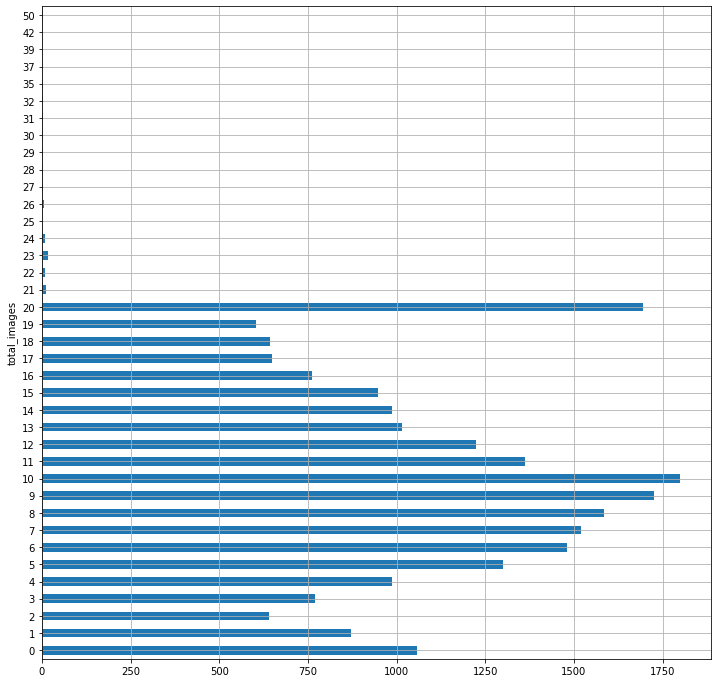

In [5]:
df.groupby('total_images')['total_images'].count().plot(kind='barh', figsize=(12,12),grid=True)

Как мы видим, большинство продавцов считают достаточным добавить в объявление 6-14 фотографий (вероятнее всего, эта цифра зависит от числа комнат), но существует и значительный пик на 20 фото (почти равный 10). Возможно это опечатка, быть может ошибка при выгрузке, а возможно у кого-то просто очень хороший вид из окна (а 20 фото - круглая, приятная цифра, на которой многие фотолюбители решили остановиться) - мы не знаем.

Text(0, 0.5, 'Дней в продаже')

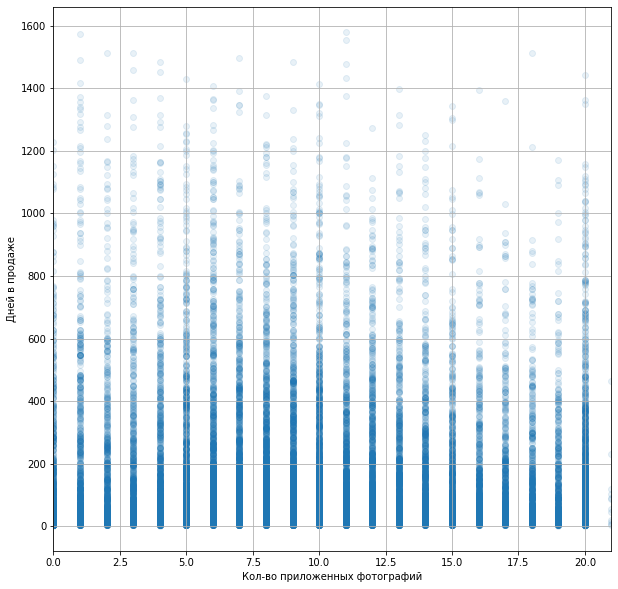

In [6]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.scatter(df['total_images'],df['days_exposition'],alpha=0.1)
plt.xlim(0,21)
plt.xlabel('Кол-во приложенных фотографий')
plt.ylabel('Дней в продаже')

Нельзя сказать, чтобы в глаза бросалась какая-нибудь очевидная закономерность, вроде "*больше фотографий - быстрее продажа*".  
[в начало](#назад2)

### last_price

Проделаем те же операции, что и с предыдущим столбцом, для информации о цене на момент снятия с торгов.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

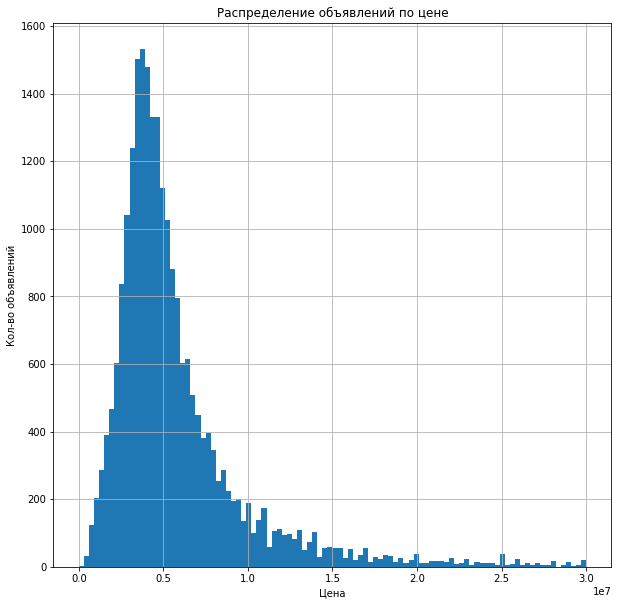

In [7]:
df['last_price'].hist(bins=100,figsize=(10,10),range =(0,30000000))
plt.xlabel('Цена')
plt.ylabel('Кол-во объявлений')
plt.title('Распределение объявлений по цене')
df['last_price'].describe()

Удивительно, но кажется данные в порядке. Да, в данном распределении довольно длинный хвост, который сильно влияет на среднее (median/mean ~ 0.7), но в итоговый анализ они скорее всего не войдут. Для анализа рынка нам вряд ли пригодятся сверхдорогие элитные объекты недвижимости — для них всё очень индвидуально. Но логичнее будет будет обрубать хвосты для объектов одной подкатегории. В данном случаее оценить кол-во выбросов и их характер для квартир с разным кол-вом комнат. Для начала оценим, сколько квартир каждого вида оказалось в нашем распоряжении.

In [8]:
table=df.groupby('rooms')['total_area'].agg(['count','median'])
table.columns=['кол-во объявлений','медианная площадь']
display(table)
print('Квартир с комнатами 1-4: {:.2%}'.format(len(df.query('0<rooms<5'))/len(df)))

,кол-во объявлений,медианная площадь
rooms,,
0,197,26.05
1,8047,36.56
2,7940,53.00
3,5814,73.00
4,1180,99.30
5,326,146.45
6,105,184.30
7,59,214.00
8,12,235.70


Квартир с комнатами 1-4: 96.97%


Вполне логичным будет отбросить очень специфичные случаи квартир с количеством комнат 5+ и остановиться на диапазоне параметра `rooms` от 1 до 4.

In [9]:
df['good_data']=(df['rooms']<=4)&(df['rooms']>=1)
table=df.query('good_data').groupby('rooms')['total_area'].agg(['count','median'])
table.columns=['кол-во объявлений','медианная площадь']
table

,кол-во объявлений,медианная площадь
rooms,,
1,8047,36.56
2,7940,53.00
3,5814,73.00
4,1180,99.30


In [10]:
#Напишем функцию для нахождения верхней и функцию для нахождения нижней границы диаграммы размаха:
def whisker_up(ser):
    whisker=ser.quantile(q=0.75)+1.5*(ser.quantile(q=0.75)-ser.quantile(q=0.25)) # Q3+1.5x(Q3-Q1)
    return whisker

def whisker_down(ser):
    us=ser.quantile(q=0.75)-1.5*(ser.quantile(q=0.75)-ser.quantile(q=0.25)) # Q1-1.5x(Q3-Q1)
    return us

Text(0, 0.5, 'Кол-во комнат')

<Figure size 1080x720 with 0 Axes>

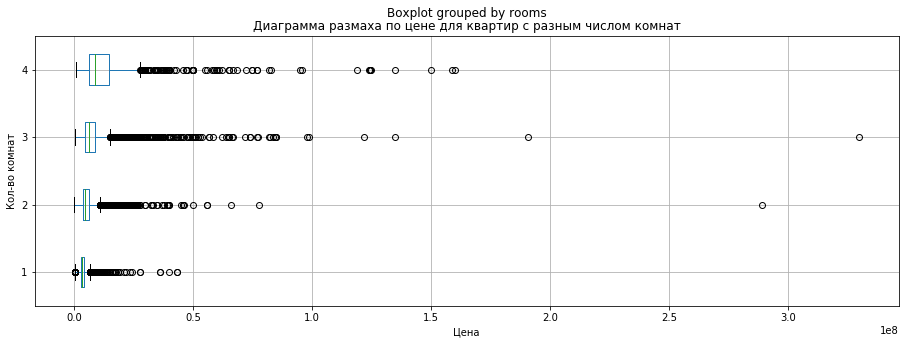

In [11]:
plt.figure(figsize=(15, 10))
df.query('good_data').boxplot(column='last_price',by='rooms',vert=False, figsize=(15, 5))
plt.title('Диаграмма размаха по цене для квартир с разным числом комнат')
plt.xlabel('Цена')
plt.ylabel('Кол-во комнат')


Отсечем квартиры, которые являются выбросами:

Text(0.5, 1.0, 'Диаграмма размаха по цене для квартир с разным числом комнат')

<Figure size 1080x720 with 0 Axes>

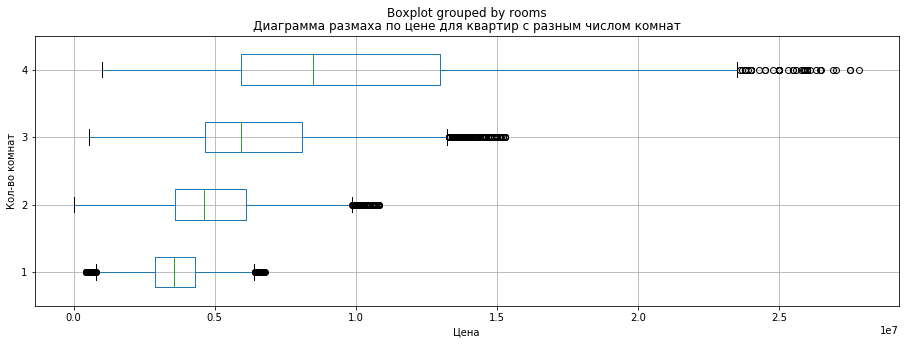

In [12]:
df_r1_gd=df.query('good_data and rooms==1')['last_price']
df_r2_gd=df.query('good_data and rooms==2')['last_price']
df_r3_gd=df.query('good_data and rooms==3')['last_price']
df_r4_gd=df.query('good_data and rooms==4')['last_price']
whisker_up1=whisker_up(df_r1_gd)
whisker_up2=whisker_up(df_r2_gd)
whisker_up3=whisker_up(df_r3_gd)
whisker_up4=whisker_up(df_r4_gd)

df['good_data']=(((df['last_price']<whisker_up1)&(df['rooms']==1))|
                ((df['last_price']<whisker_up2)&(df['rooms']==2))|
                ((df['last_price']<whisker_up3)&(df['rooms']==3))|
                ((df['last_price']<whisker_up4)&(df['rooms']==4))
                )

plt.figure(figsize=(15, 10))
df.query('good_data').boxplot(column='last_price',by='rooms',vert=False, figsize=(15, 5))
plt.xlabel('Цена')
plt.ylabel('Кол-во комнат')
plt.title('Диаграмма размаха по цене для квартир с разным числом комнат')

Отсечем сверхдорогие квартиры, лежащие за пределами интервала усов, но не будем усердствовать и оставим несколько выбросов близких к границе. Если эти квартиры действительно переоценены, то скорее всего объявление о продаже должно очень долго провисеть на сайте — это поможет лучше оценить характерное время продажи. А если нет и эти квартиры продались быстро, то мы ошиблись и квартира стоит своих денег, а мы не учли скрытые параметры вроде отделки или технического оснащения:

Вызывает большие вопросы нижняя граница цен. Что это за конура, которую можно приобрести по ценам порядка 15тыс руб?  
  
[Lenta.ru](https://lenta.ru/news/2019/12/26/cheapest_condo/#:~:text=%D0%9C%D0%B8%D0%BD%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F%20%D1%81%D1%82%D0%BE%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D1%8C%20%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80%D1%8B%20%D0%B2%20%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8,%D0%B2%20%D0%B4%D0%BE%D0%BC%D0%B5%201992%20%D0%B3%D0%BE%D0%B4%D0%B0%20%D0%BF%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B9%D0%BA%D0%B8) от 26.12.2019:

>*Минимальная стоимость квартиры в России — 70 тысяч рублей. В такую сумму оценили лот в республике Коми, говорится в материалах ЦИАН, поступивших в редакцию «Ленты.ру».
>Согласно описанию в базе ЦИАН, самая дешевая российская квартира расположена в поселке городского типа Воргашор в доме 1992 года постройки. В ней выполнен косметический ремонт. Общая площадь квартиры — 36,5 квадратного метра.*

Оценим, сколько предложений лежат в диапазоне до 1 млн руб:

In [13]:
print('Квартир с ценой ниже миллиона:',len(df.query('last_price<1000000')))

Квартир с ценой ниже миллиона: 225


Есть вероятность, что эти объекты невдижимости всё же реальны. Но зачем рисковать и засорять данные? Этот процент, как и сверхдорогие квартиры, также не является типичным предложением на рынке, а значит мы вполне можем ими пожертвовать. Меньше сомнительных данных — меньше оговорок в результатах исследования.  
[в начало](#назад2)

### total_area

Будем двигаться по той же схеме, что и с ценами на квартиру. Построим гистограмму:

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

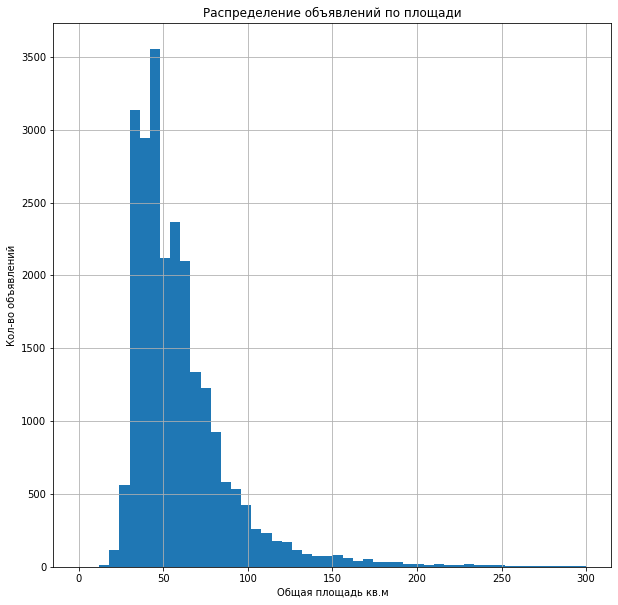

In [14]:
df['total_area'].hist(bins=50,figsize=(10,10),range =(0,300))
plt.title('Распределение объявлений по площади')
plt.xlabel('Общая площадь кв.м')
plt.ylabel('Кол-во объявлений')
df['total_area'].describe()

Кажется, кто-то продает квартиру, соизмеримую с футбольным полем при медиане в 52 кв.м. Посмотрим, изменится ли ситуация, если мы рассмотрим только данные, которые мы пометили как "хорошие" при анализе цен.

count    21672.000000
mean        55.247792
std         22.165851
min         12.000000
25%         39.400000
50%         50.000000
75%         65.270000
max        284.000000
Name: total_area, dtype: float64

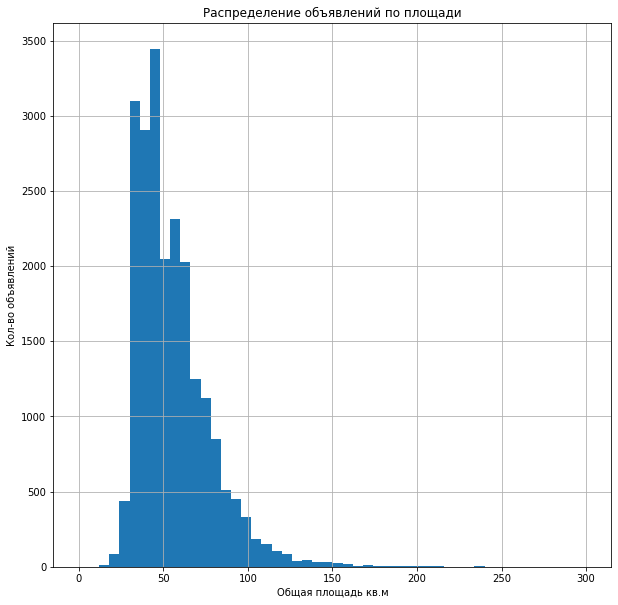

In [15]:
df_good=df.query('good_data')
df_good['total_area'].hist(bins=50,figsize=(10,10),range =(0,300))
plt.title('Распределение объявлений по площади')
plt.xlabel('Общая площадь кв.м')
plt.ylabel('Кол-во объявлений')
df_good['total_area'].describe()

Ситуация изменилась к лучшему - из списка пропали квартиры с площадью существенно больше 200 кв.м. Посмотрим, как выглядит характерное значение площади квартир от кол-ва комнат:

In [16]:
table=df_good.groupby('rooms')['total_area'].agg(['count','median'])
table.columns=['кол-во объявлений','медианная площадь']
table

,кол-во объявлений,медианная площадь
rooms,,
1,7716,36.000
2,7488,52.205
3,5375,71.500
4,1093,96.000


Как видно из таблицы, большинство объявлений приходится на квартиры с кол-вом комнат от 1 до 4. Вероятно, стоит сосредоточиться на квартирах именно из этого диапазона. Для квартир с большим кол-вом комнат в вопрос ценообразования вступает большее кол-во неизвестным нам переменных (кол-во санузлов в квартире, архитектурные особенности и проч) и каждая квартира становится всё более индивидуальной. Например с 7 комнатами в нашем распоряжении данные всего по одной квартире, а её площадь отличается от медианной площади для квартиры с 6 комнатами на 75кв.м - в такой разброс уместится целиком ещё одна типичная трехкомнатная квартира с кухней и всем прочим.  
  
Поэтому к уже отфильтрованным по цене квартирам применим ещё один по кол-ву комнат и оставим квартиры из диапазона от 1 до 4 - нас всё-таки интересуют квартиры, а не жилые дома и пентхаусы. Указанного диапазона вполне достаточно, чтобы оценить характер (линейный, квадратичный, иной) нарастания цены от кол-ва комнат.
  
Также стоит оценить, насколько велик разброс и не пропустили ли мы каких-нибудь артефактов внутри каждой из 4 категорий (то, что для четырехкомнатной квартиры будет близким к медиане, для однокомнатной - однозначная аномалия).

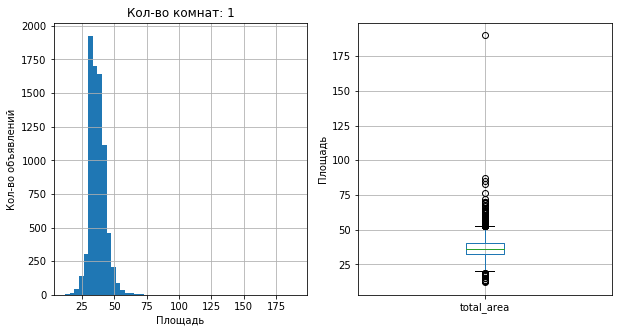

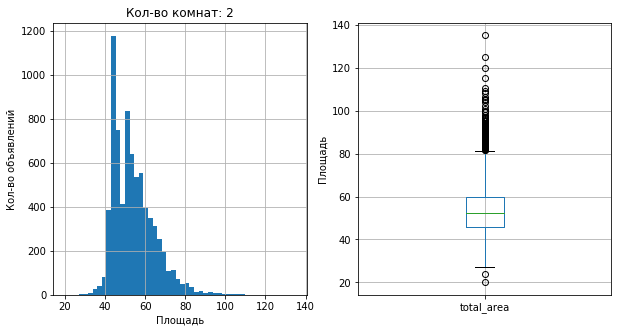

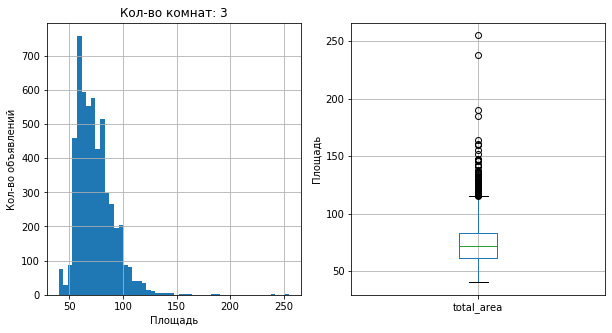

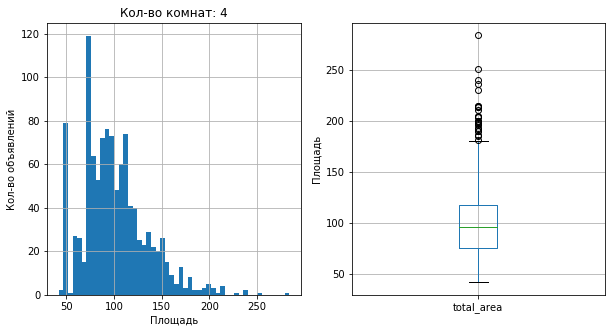

In [17]:
df['good_data']=(df['good_data'])&(df['rooms']>0)&(df['rooms']<5)
df_good=df.query('good_data')

for i in (1,2,3,4):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    df_good.query('rooms==@i')['total_area'].hist(bins=50)
    plt.xlabel('Площадь')
    plt.ylabel('Кол-во объявлений')
    plt.title('Кол-во комнат: '+str(i))
    plt.subplot(1, 2, 2)
    df_good.query('rooms==@i').boxplot(column='total_area')
    plt.ylabel('Площадь')

На диаграммах явно видны множественные выбросы. Построим заодно сводную таблицу с медианной площадью для квартир с разным числом комнат:

In [18]:
df_good=df.query('good_data')
table=df_good.groupby('rooms')['total_area'].agg(['count','median'])
table.columns=['кол-во объявлений','характерная площадь']
table

,кол-во объявлений,характерная площадь
rooms,,
1,7716,36.000
2,7488,52.205
3,5375,71.500
4,1093,96.000


Согласно [СНиП 31-01-2003](http://docs.cntd.ru/document/456054198) с правками от 2016 г.:

In [19]:
pd.DataFrame(columns=['Кол-во комнат','Рекомендуемая площадь квартир м2'], data=[[1,'28-38'],[2,'44-53'],[3,'56-65'],[4,'70-77'],[5,'84-96']])

,Кол-во комнат,Рекомендуемая площадь квартир м2
0,1,28-38
1,2,44-53
2,3,56-65
3,4,70-77
4,5,84-96


Похоже на правду. Время идёт, стандарты меняются, но не радикально. Не все отмеченные  на диаграммах выбросы выглядят нереалистичными. Можно без особенного труда найти проекты однокомнатных квартир и на 55 и, если постараться, на 60 кв м. Мы можем исходить из соображений, что типичное жилье вряд ли превышает рекомендуемую минимальную площадь больше, чем в 2 раза. При слишком большой площади в любом случае придется вносить дополнительные силовые элементы - так почему же не сделать на той же площади две комнаты вместо одной? Поэтому откинем квартиры со слишком высокой площадью:

In [20]:
#верхние границы
col_name='total_area'
whisker_up1=whisker_up(df.query('good_data and rooms==1')[col_name])
whisker_up2=whisker_up(df.query('good_data and rooms==2')[col_name])
whisker_up3=whisker_up(df.query('good_data and rooms==3')[col_name])
whisker_up4=whisker_up(df.query('good_data and rooms==4')[col_name])
#нижние границы
whisker_down1=14
whisker_down2=16
whisker_down3=16
whisker_down4=whisker_down(df.query('good_data and rooms==4')[col_name])
#добавим фильтр
df['good_data']=(df['good_data'] & 
                (
                ((df['rooms']==1) & (df[col_name]<=whisker_up1) & (df[col_name]>=whisker_down1)) |
                ((df['rooms']==2) & (df[col_name]<=whisker_up2) & (df[col_name]>=whisker_down2)) |
                ((df['rooms']==3) & (df[col_name]<=whisker_up3) & (df[col_name]>=whisker_down3)) |
                ((df['rooms']==4) & (df[col_name]<=whisker_up4) & (df[col_name]>=whisker_down4))
                )
                )
# построим таблицу с кол-вом объявлений и медианной площадью:
df_good=df.query('good_data')
table=df_good.groupby('rooms')['total_area'].agg(['count','median'])
table.columns=['кол-во объявлений','характерная площадь']
table

,кол-во объявлений,характерная площадь
rooms,,
1,7590,36.0
2,7356,52.0
3,5272,71.0
4,985,98.0


Как видим, наши манипуляции не слишком сказались на медиане.

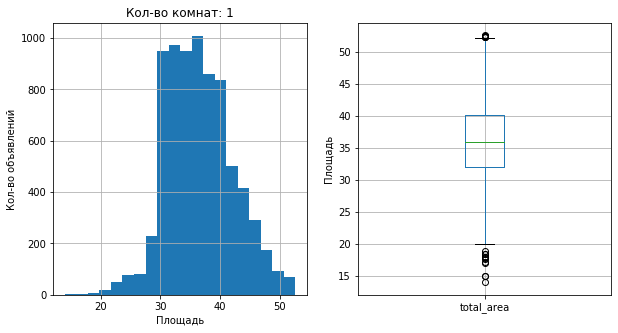

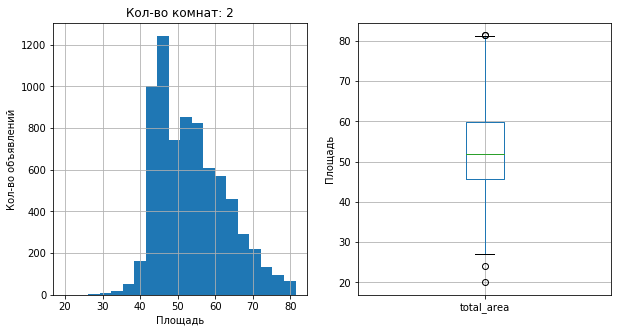

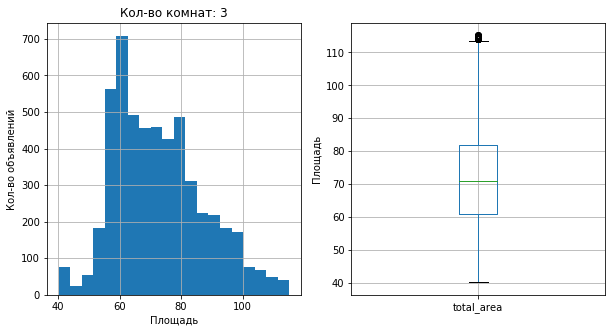

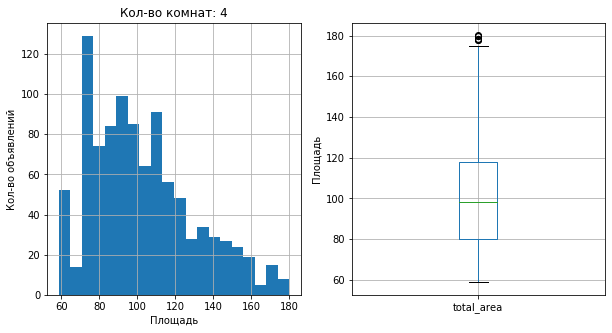

In [21]:
df_good=df.query('good_data')

for i in (1,2,3,4):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    df_good.query('rooms==@i')['total_area'].hist(bins=20)
    plt.xlabel('Площадь')
    plt.ylabel('Кол-во объявлений')
    plt.title('Кол-во комнат: '+str(i))
    plt.subplot(1, 2, 2)
    df_good.query('rooms==@i').boxplot(column='total_area')
    plt.ylabel('Площадь')

Уже гораздо лучше, но всё ещё смущает второй большой пик. На момент проведения исследования на сайте [cian.ru](cian.ru) в Москве удалось найти лишь 1 объект с планировкой близкой к условию (56 кв.м), а на Яндекс.Недвижимости 1 объект с площадью 50.5 кв.м. Зато в Санкт-Петербурге и правда обнаружилось полторы сотни выставленных на продажу четырехкомнатных квартир с площадью до 50 кв.м. Судя по фотографиям и приложенным к ним планам — это реальность, данная нам в ощущениях, и в Питере существуют квартиры с комнатами менее 6 кв.м.  
Вероятнее всего эти квартиры находятся в домах серии ГИ. [ru.wikipedia.org](https://ru.wikipedia.org/wiki/%D0%93%D0%98_(%D1%81%D0%B5%D1%80%D0%B8%D1%8F_%D0%B4%D0%BE%D0%BC%D0%BE%D0%B2)):  
>До 1961 года дома выполнялись из крупных блоков (Г-1И и Г-3И). Затем дома монтировались из крупных панелей.  
Наружные стены выполнены из легких газобетонных элементов. Стены не декорировались — при производстве в плиты добавлялся окрас. Балконы и подоконники отсутствуют. Отличительными особенностями данной серии (для домов в пятиэтажном исполнении) является наличие только двух квартир на этаже (всего 10 квартир в подъезде), а также отсутствие однокомнатных и двухкомнатных вариантов квартир (только трёхкомнатные 41 м2 и четырёхкомнатные 49 м2). В квартирах кухни площадью 5 м2, совмещенные санузлы — 2 м2. Высота потолка 2,5 м, в санузле 2,3 м. Однокомнатные и двухкомнатные квартиры появились только в более поздних «башнях».  
...  
Строились в Ленинграде и Колпино, Кингисеппе, Выборге, Приозерске и Пикалёво с 1959 по 1968 год, также в посёлке Свердлова и отдельные дома в Ломоносове, посёлке Ленсоветовский, Колтушах, Никольском, Любани и посёлке Пудомяги.

Что объясняет также наличие небольшого пика на диаграмме среди трехкомантных квартир. Проверим населенные пункты, в которых находятся похожие квартиры:

In [22]:
df.query('good_data and ((rooms==4 and total_area<=50) or (rooms==3 and total_area<=42))').groupby('locality_name')['locality_name'].agg(['count'])

,count
locality_name,
Ломоносов,1
Никольское,1
Санкт-Петербург,62
деревня Пудомяги,1
поселок городского типа имени Свердлова,1
посёлок Возрождение,1
посёлок Шушары,1


Что и требовалось доказать. Выключать эти данные из анализа не стоит - они являются особенностью данного рынка.  
[в начало](#назад2)

### first_day_exposition

Столбец с датой размещения объявления. Приведем данные в столбце к типу datetime:
2019-03-07T00:00:00

In [23]:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'], format='%Y%m%dT%H:%M:%S')
display(df.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,good_data
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,True
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,True
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,True
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,False
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,False


Построим гистограмму кол-ва выкладываемых объявлений от даты для данных, которым мы пока доверяем:

(array([735599., 735780., 735964., 736146., 736330., 736511., 736695.,
        736876., 737060., 737241.]),
 <a list of 10 Text xticklabel objects>)

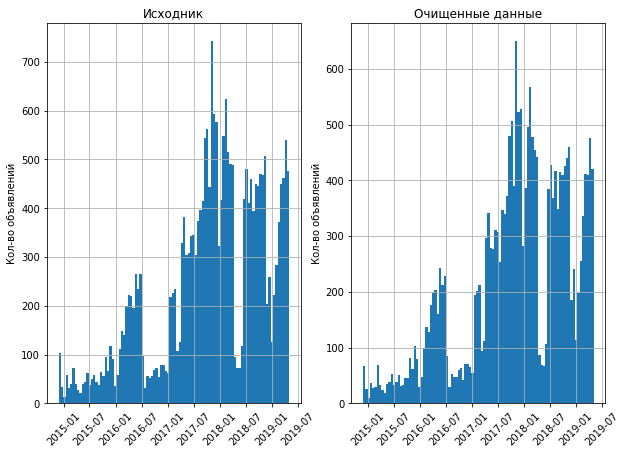

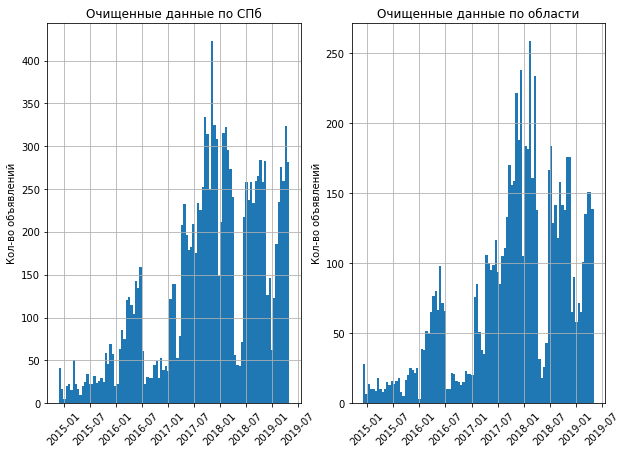

In [24]:
plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1)
df['first_day_exposition'].hist(bins=100)
plt.ylabel('Кол-во объявлений')
plt.title('Исходник')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
df.query('good_data')['first_day_exposition'].hist(bins=100)
plt.ylabel('Кол-во объявлений')
plt.title('Очищенные данные')
plt.xticks(rotation=45)

plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1)
df.query('good_data and locality_name=="Санкт-Петербург"')['first_day_exposition'].hist(bins=100)
plt.ylabel('Кол-во объявлений')
plt.title('Очищенные данные по СПб')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
df.query('good_data and locality_name!="Санкт-Петербург"')['first_day_exposition'].hist(bins=100)
plt.ylabel('Кол-во объявлений')
plt.title('Очищенные данные по области')
plt.xticks(rotation=45)

Судя по графику, значения, которые мы отфильтровали, не влияют на общее распределение. Можно отметить тренд на увеличение предложения. При этом он не зависит от того, рассматривываем мы Санкт-Петербург или область. На графике есть регулярные провалы - возможно удастся выделить сезонность.  
[в начало](#назад2)

### rooms
<a id="rooms" ></a>
Мы уже успели поработать с этим параметром. Но, чтобы быть последовательными, ещё раз взглянем на то, что было в исходных данных, и то, что мы выделили как данные, пригодные для анализа: 

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

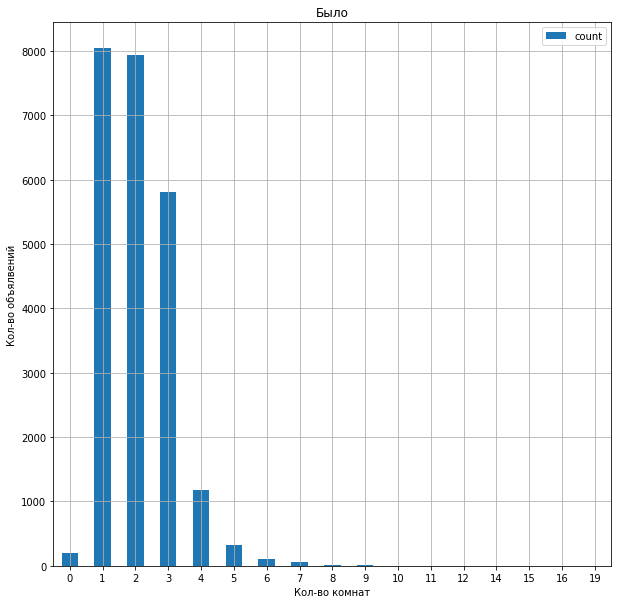

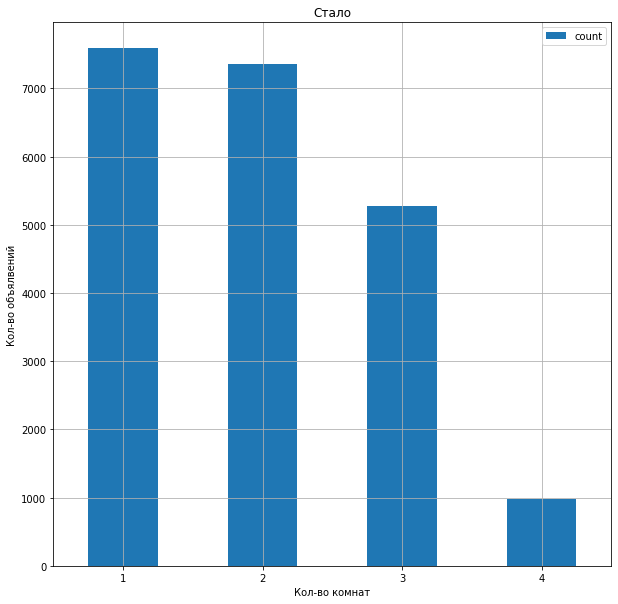

In [25]:
df.groupby('rooms')['rooms'].agg(['count']).plot(kind='bar',grid=True,figsize=(10,10))
plt.title('Было')
plt.xticks(rotation=0)
plt.xlabel('Кол-во комнат')
plt.ylabel('Кол-во объялвений')
df.query('good_data').groupby('rooms')['rooms'].agg(['count']).plot(kind='bar',grid=True,figsize=(10,10))
plt.title('Стало')
plt.xlabel('Кол-во комнат')
plt.ylabel('Кол-во объялвений')
plt.xticks(rotation=0)

[в начало](#назад2)

### ceiling_height
Построим диаграмму размаха:

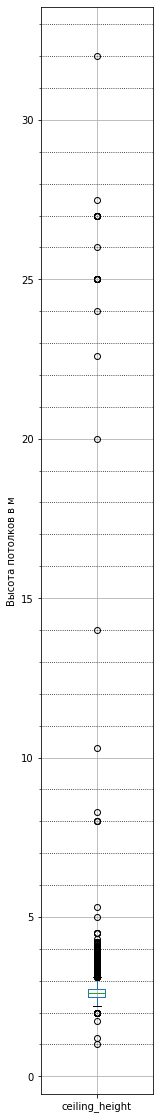

In [26]:
df.query('good_data').boxplot(column='ceiling_height',figsize=(2,20))
plt.ylabel('Высота потолков в м')
plt.minorticks_on()
plt.grid(which='minor', color = 'k', linestyle = ':')


Оценим данные на адекватность. Обратимся к тому же [СНиП 31-01-2003](http://docs.cntd.ru/document/456054198):

>5.8 Высота (от пола до потолка) жилых комнат и кухни (кухни-столовой) в климатических подрайонах IA, IБ, IГ, IД и IVА, определяемых по СП 131.13330, должна быть не менее 2,7 м, а в других климатических подрайонах - не менее 2,5 м.  
Высота внутриквартирных коридоров, холлов, передних, антресолей и под ними определяется условиями безопасности передвижения людей и должна составлять не менее 2,1 м.

Поэтому в категорию слишком низких потолков отправим квартиры с высотой потолков менее 2.5м. Для верхней оценки будем ориентироваться на [СНиП сталинских времён](http://www.norm-load.ru/SNiP/old-snip/snip_54/226-230.htm), который регламентировал минимальную высоту потолков в климатической зоне Москвы и Ленинграда в 3 метра. На практике потолки в домах этой серии достигали значений 3.2-3.3 м. Всё, что окажется за предалами "сталинского ампира", будем считать нетипичным жильём.


In [27]:
print('Слишком низких:',len(df.query('good_data and 0<ceiling_height<2.5')))
print('Обычные потолки:',len(df.query('good_data and 2.5<=ceiling_height<2.9')))
print('Высокие потолки:',len(df.query('good_data and 2.9<=ceiling_height<=3.3')))
print('Слишком высокие потолки',len(df.query('good_data and 3.3<ceiling_height')))

Слишком низких: 73
Обычные потолки: 10944
Высокие потолки: 1578
Слишком высокие потолки 330


Гистограммы пилообразны и явно тяготеют к значениям кратным 5. Нам наверняка стоит откинуть откинуть сверхнизкие (<2.5м) и слишком высокие (>3.3м). Значения пропусков `NaN` можно позже заполнить медианным значением среди данных, которым мы доверяем.

In [28]:
df['good_data']=(df['good_data'])&((df['ceiling_height']>=2.5)&(df['ceiling_height']<=3.3)|(df['ceiling_height'].isna()))

[в начало](#назад2)

### floors_total
Сгруппируем и посмотрим, какой этажности строения и в каком количестве нам достались:

,count
floors_total,
1.0,21
2.0,342
3.0,553
4.0,916
5.0,5172
6.0,602
7.0,417
8.0,237
9.0,3596


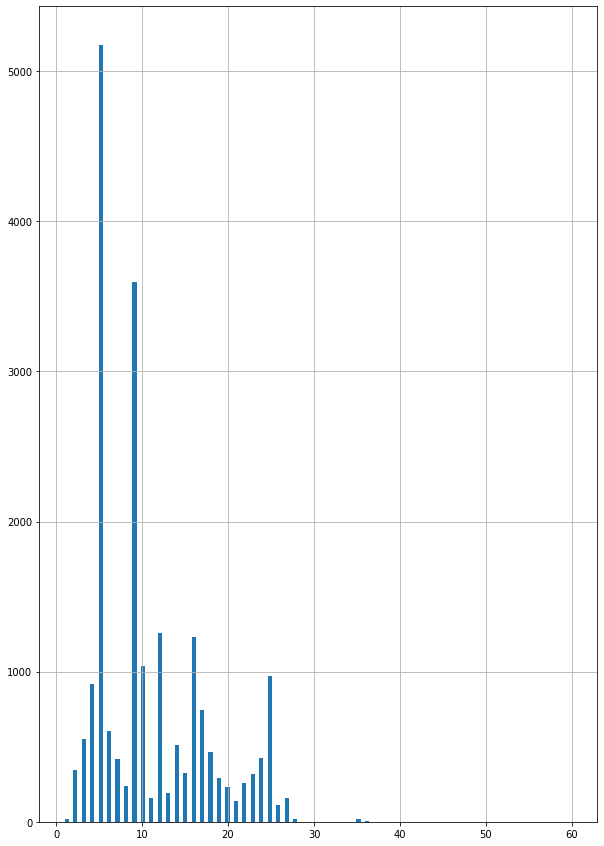

In [29]:
display(df.query('good_data').groupby('floors_total')['floors_total'].agg(['count']))
df.query('good_data')['floors_total'].hist(bins=120,figsize=(10,15))

Посчитаем верхнюю границу "ящика с усами":

In [30]:
df.query('good_data')['floors_total'].describe()

count    20732.000000
mean        10.830600
std          6.620989
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Видимо стоит остановиться на домах с высотой до 27 этажах. А ещё откинуть одноэтажные дома: во-первых, их очень мало,а во-вторых, не очень понятно куда мы их денем при распределении квартир по категориям положения в доме `первый`,`последний`,`другое`, чтобы не кривить душой.

,count
floors_total,
2.0,342
3.0,553
4.0,916
5.0,5172
6.0,602
7.0,417
8.0,237
9.0,3596
10.0,1036


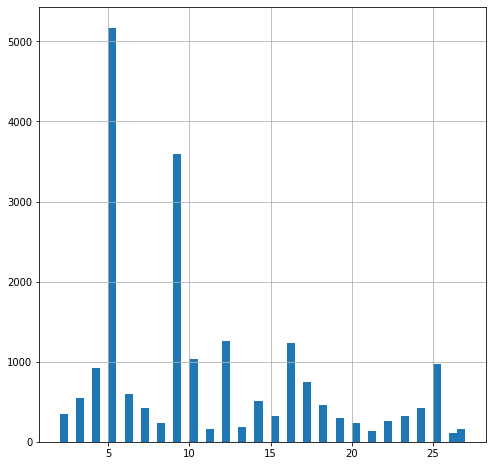

In [31]:
df['good_data']=(df['good_data']&(df['floors_total']>1)&(df['floors_total']<=27))
display(df.query('good_data').groupby('floors_total')['floors_total'].agg(['count']))
df.query('good_data')['floors_total'].hist(bins=50,figsize=(8,8))

[в начало](#назад2)

### living_area


<Figure size 1080x720 with 0 Axes>

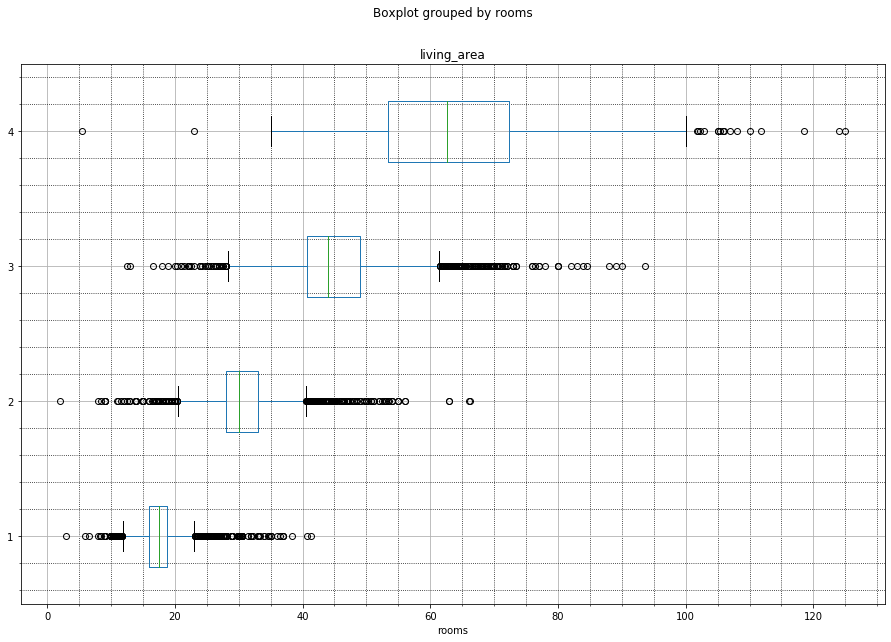

In [32]:
plt.figure(figsize=(15, 10))
df.query('good_data').boxplot(column='living_area',by='rooms',vert=False, figsize=(15, 10))
plt.minorticks_on()
plt.grid(which='minor', color = 'k', linestyle = ':')

In [33]:
whisker_up1=whisker_up(df.query('good_data')['living_area'])
print('Выбросов:',len(df.query('good_data and living_area>@whisker_up1')))

Выбросов: 226


На всякий случай проверим на адекватность соотношения жилой площади к общей для данных, в которых отсутствует `NaN`:

In [34]:
df.query('living_area>=total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,good_data
9861,10,2350000.0,25.0,2017-12-03,0,NaN,22.0,25.0,17,NaN,...,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,13.0,False
12691,1,3700000.0,24.2,2017-11-10,0,NaN,19.0,24.2,13,NaN,...,1.0,Санкт-Петербург,17837.0,16840.0,0.0,NaN,2.0,210.0,74.0,False



Среди объявлений есть два с жилой площадью равной общей. Но и они уже исключены предыдущими фильтрами.  
Также мы видим, что минимальная жилая площадь в колонке указана как 2 кв.м. Скорее всего, это опечатка в объявлении, а возможно просто случаные данные. Согласно критериям всё того же [СНиП 31-01-2003](http://docs.cntd.ru/document/456054198), минимальная рекомендуемая для согласования проекта жилая площадь однокомнатных квартир 14 кв.м., а для двух и более комнат как 16 кв.м. СНиП от 1954 года рекомендует большие площади, поэтому для нижней границы выберем именно современный СНиП.
Добавим фильтр выбросов по жилой площади:

In [35]:
#верхние границы
col_name='living_area'
whisker_up1=whisker_up(df.query('good_data and rooms==1')[col_name])
whisker_up2=whisker_up(df.query('good_data and rooms==2')[col_name])
whisker_up3=whisker_up(df.query('good_data and rooms==3')[col_name])
whisker_up4=whisker_up(df.query('good_data and rooms==4')[col_name])
#нижние границы
whisker_down1=14
whisker_down2=16
whisker_down3=16
whisker_down4=whisker_down(df.query('good_data and rooms==4')[col_name])
#добавим фильтр и сохраним строки со значениями NaN, которым мы доверяем
df['good_data']=(df['good_data'] & 
                (
                ((df['rooms']==1) & (df[col_name]<=whisker_up1) & (df[col_name]>=whisker_down1)) |
                ((df['rooms']==2) & (df[col_name]<=whisker_up2) & (df[col_name]>=whisker_down2)) |
                ((df['rooms']==3) & (df[col_name]<=whisker_up3) & (df[col_name]>=whisker_down3)) |
                ((df['rooms']==4) & (df[col_name]<=whisker_up4) & (df[col_name]>=whisker_down4))|
                ((df[col_name].isna()))
                )
                )

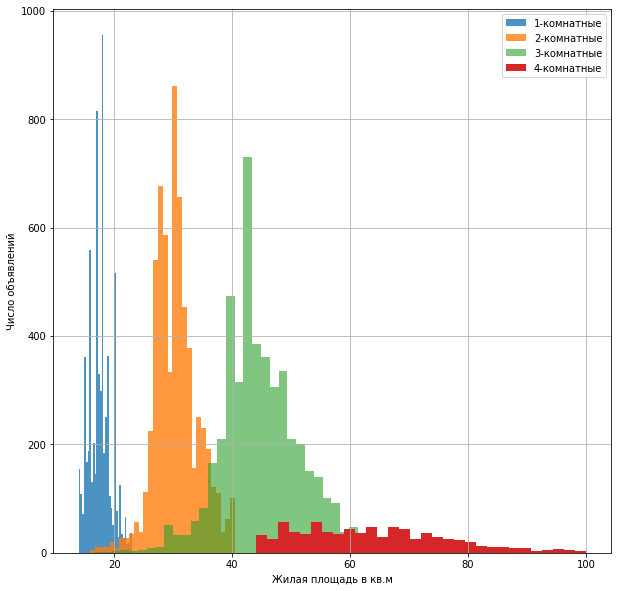

In [36]:
plt.figure(figsize=(10,10))
df.query('good_data and rooms==1')['living_area'].plot(kind='hist',bins=30,alpha=0.8)
df.query('good_data and rooms==2')['living_area'].plot(kind='hist',bins=30,alpha=0.8)
df.query('good_data and rooms==3')['living_area'].plot(kind='hist',bins=30,alpha=0.6)
df.query('good_data and rooms==4')['living_area'].plot(kind='hist',bins=30,alpha=1,grid=True)
plt.xlabel('Жилая площадь в кв.м')
plt.ylabel('Число объявлений')
plt.legend(['1-комнатные','2-комнатные','3-комнатные','4-комнатные'])


Из диаграммы видно, что для 1-,2- и 3-комнатных квартир есть ярко выраженная характерная жилая площадь, в то время как для 4-комнатных квартир существует широкий диапазон без ярко выраженного пика. Вероятно тут роль играет меньшее кол-во 4-комнатных квартир в выборке относительно остальных и при этом большее разнообразие внутри категории (например второй пик маленьких четырехкомнатных хрущевок).

<Figure size 1080x720 with 0 Axes>

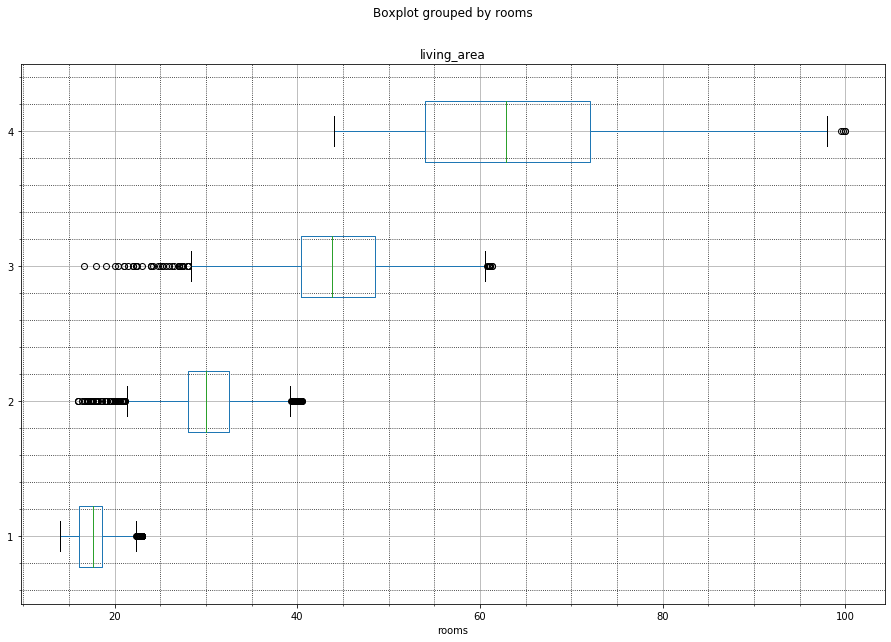

In [37]:
plt.figure(figsize=(15, 10))
df.query('good_data').boxplot(column='living_area',by='rooms',vert=False, figsize=(15, 10))
plt.minorticks_on()
plt.grid(which='minor', color = 'k', linestyle = ':')

[в начало](#назад2)

### floor
Взглянем на распределение квартир по этажам и 

In [38]:
df.query('good_data')['floor'].value_counts()

2     2747
1     2521
3     2488
4     2253
5     2222
6     1070
7     1029
8      946
9      919
10     589
12     439
11     435
13     311
15     291
14     290
16     269
17     191
18     148
19     109
22      95
21      94
20      91
23      83
24      49
25      36
26      17
27       6
Name: floor, dtype: int64

проверим, не продает ли кто-нибудь жилье за пределами указанного дома:

In [39]:
print('Этажей за пределами диапазона:',len(df[df['floor']>df['floors_total']]))

Этажей за пределами диапазона: 0


### is_apartment

Не самый интересный для нас столбец с большим количеством пропусков.

In [40]:
print('Информация об апартаментах не указана в',df.is_apartment.isna().sum(),'записях из',len(df))


Информация об апартаментах не указана в 20924 записях из 23699


### studio

In [41]:
print('Кол-во студий среди всех квартир:')
display(df['studio'].agg(['mean','sum']))
print('Кол-во студий, среди квартир, данным о которых мы доверяем:')
display(df.query('good_data')['studio'].agg(['mean','sum']))

Кол-во студий среди всех квартир:


mean      0.006287
sum     149.000000
Name: studio, dtype: float64

Кол-во студий, среди квартир, данным о которых мы доверяем:


mean    0.000405
sum     8.000000
Name: studio, dtype: float64

До первичной сортировки данных, таких квартир было не много - всего полпроцента. После сортировки осталось и того меньше. Вряд ли удастся оценить влияние этого параметра на стоимость квартиры.

### open_plan
Квартир со свободной планировкой

In [42]:
print('Кол-во со свободной планировкой среди всех квартир:')
display(df['open_plan'].agg(['mean','sum']))
print('Кол-во со свободной планировкой среди квартир, данным о которых мы доверяем:')
display(df.query('good_data')['open_plan'].agg(['mean','sum']))

Кол-во со свободной планировкой среди всех квартир:


mean     0.002827
sum     67.000000
Name: open_plan, dtype: float64

Кол-во со свободной планировкой среди квартир, данным о которых мы доверяем:


mean    0.000253
sum     5.000000
Name: open_plan, dtype: float64

Аналогично праметру `studio`  
[в начало](#назад2)

### kitchen_area
В столбце хватает пропущенных значений, но у нас есть возможность оценить, сколько из них выглядят разумно:

<Figure size 1080x720 with 0 Axes>

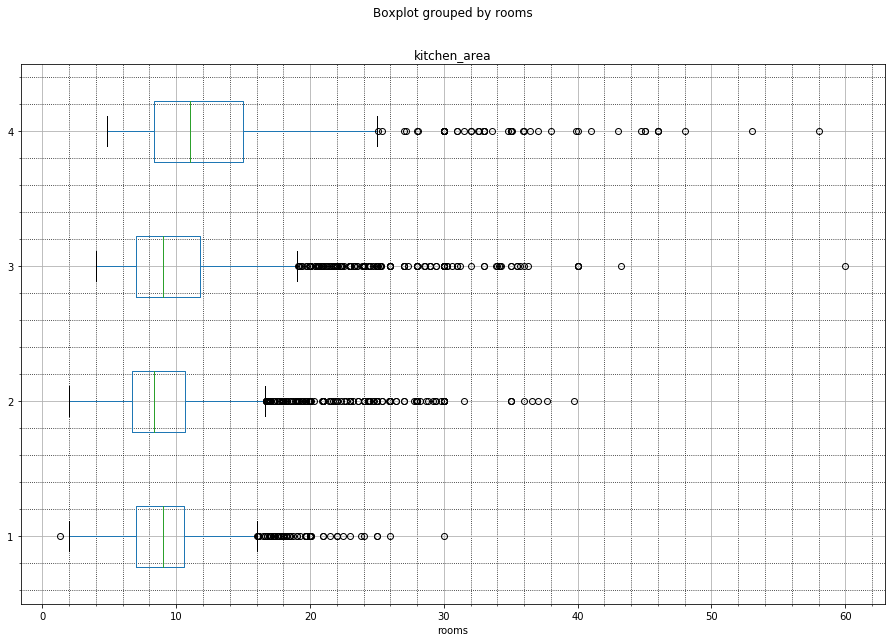

In [43]:
plt.figure(figsize=(15, 10))
df.query('good_data').boxplot(column='kitchen_area',by='rooms',vert=False, figsize=(15, 10))
plt.minorticks_on()
plt.grid(which='minor', color = 'k', linestyle = ':')

Поступим по аналогии `living_area`:

In [44]:
#верхние границы
col_name='kitchen_area'
whisker_up1=whisker_up(df.query('good_data and rooms==1')[col_name])
whisker_up2=whisker_up(df.query('good_data and rooms==2')[col_name])
whisker_up3=whisker_up(df.query('good_data and rooms==3')[col_name])
whisker_up4=whisker_up(df.query('good_data and rooms==4')[col_name])
#нижние границы
whisker_down1=5
whisker_down2=whisker_down(df.query('good_data and rooms==2')[col_name])
whisker_down3=whisker_down(df.query('good_data and rooms==3')[col_name])
whisker_down4=whisker_down(df.query('good_data and rooms==4')[col_name])
#добавим фильтр и сохраним строки со значениями NaN, которым мы доверяем
df['good_data']=(df['good_data'] & 
                (
                ((df['rooms']==1) & (df[col_name]<=whisker_up1) & (df[col_name]>=whisker_down1)) |
                ((df['rooms']==2) & (df[col_name]<=whisker_up2) & (df[col_name]>=whisker_down2)) |
                ((df['rooms']==3) & (df[col_name]<=whisker_up3) & (df[col_name]>=whisker_down3)) |
                ((df['rooms']==4) & (df[col_name]<=whisker_up4) & (df[col_name]>=whisker_down4))|
                ((df[col_name].isna()))
                )
                )

In [45]:
df.query('good_data').isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           7584
floors_total                0
living_area              1544
floor                       0
is_apartment            16960
studio                      0
open_plan                   0
kitchen_area             1700
balcony                  9124
locality_name              37
airports_nearest         4937
cityCenters_nearest      4927
parks_around3000         4926
parks_nearest           13330
ponds_around3000         4926
ponds_nearest           12517
days_exposition          2318
good_data                   0
dtype: int64

[в начало](#назад2)

### balcony
Оценим имеющиеся у нас варианты и кол-во пропусков:

In [46]:
display(df['balcony'].value_counts())
print('Число пропусков:',df['balcony'].isna().sum())

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Число пропусков: 11519


Будем придерживаться гипотезы, что `NaN` является синонимом отсутствия балконов и заполним эти значения нулями:

In [47]:
df['balcony']=df['balcony'].fillna(0)
display(df['balcony'].value_counts())
print('Число пропусков:',df['balcony'].isna().sum())

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Число пропусков: 0


### locality_name

In [48]:
for i in (df['locality_name'].unique()):
    print(':{:.<60}:'.format(i))

:Санкт-Петербург.............................................:
:посёлок Шушары..............................................:
:городской посёлок Янино-1...................................:
:посёлок Парголово...........................................:
:посёлок Мурино..............................................:
:Ломоносов...................................................:
:Сертолово...................................................:
:Петергоф....................................................:
:Пушкин......................................................:
:деревня Кудрово.............................................:
:Коммунар....................................................:
:Колпино.....................................................:
:поселок городского типа Красный Бор.........................:
:Гатчина.....................................................:
:поселок Мурино..............................................:
:деревня Фёдоровское...................................

У нас очевидные проблемы. Помимо пропусков в столбце `locality_name` встречаются множество искажений. Бросаются в глаза одни и те же названия населенных пунктов, но с буквами *ё* вместо *е*. Или например *Кудрово* и *деревня Кудрово* - данный населенный пункт стал городом лишь в 2018 году. Заполним пропуски на *unknown*. Создадим новый столбец `new_locality_name`:
- запишем названия строчными буквами;
- заменим буквы *ё* на *е*;
- избавимся от типа населенного пункта в названии.

In [49]:
# заполнение ячейки NaN строкой unknown
df['locality_name']=df['locality_name'].fillna('unknown')
# копирование названий строчными буквами
df['new_locality_name']=df['locality_name'].str.lower()
# замена ё на е
df['new_locality_name']=df['new_locality_name'].str.replace('ё','е')

# список исключений
trash=['коттеджный ','при железнодорожной станции ',
       'городского типа ','городской ',
       'поселок ','деревня ',
       'садоводческое некоммерческое товарищество ','садовое товарищество ','станции ','село ']
# очистка
for i in trash:
    df['new_locality_name']=df['new_locality_name'].str.replace(i,'')

# вывод городов с наибольшим числом объявлений
print('locality_name топ-10:')
print(df['locality_name'].value_counts().head(10))
print('Суммарно:', df['locality_name'].value_counts().head(10).sum())

print('\nnew_locality_name топ-10:')
print(df['new_locality_name'].value_counts().head(10))
print('Суммарно:', df['new_locality_name'].value_counts().head(10).sum())

print('\nnew_locality_name топ-10 в списке good_data:')
print(df.query('good_data')['new_locality_name'].value_counts().head(10))
print('Суммарно:', df.query('good_data')['new_locality_name'].value_counts().head(10).sum())

locality_name топ-10:
Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64
Суммарно: 18958

new_locality_name топ-10:
санкт-петербург    15721
мурино               590
кудрово              472
шушары               440
всеволожск           398
пушкин               369
колпино              338
парголово            327
гатчина              307
выборг               237
Name: new_locality_name, dtype: int64
Суммарно: 19199

new_locality_name топ-10 в списке good_data:
санкт-петербург    12088
мурино               502
шушары               398
кудрово              397
всеволожск           348
колпино              313
пушкин               297
гатчина              287
парголово            279
выборг               205
Name: new_locality_name, dtype:

Как видим, топ изменился весьма значительно. Например, Кудрово с нижних позиций (299 объявлений) переместился на третье место (472 объявления). Отфильтрованный нами список `good_data` немного меняет ситуацию с положением маленьких городов в нём, но консистентно повторяет версию до фильтрации — большая часть исключенных объявлений приходится на Санкт-Петербург.

In [50]:
for i in (df['new_locality_name'].unique()):
    print(':{:.<60}:'.format(i))

:санкт-петербург.............................................:
:шушары......................................................:
:янино-1.....................................................:
:парголово...................................................:
:мурино......................................................:
:ломоносов...................................................:
:сертолово...................................................:
:петергоф....................................................:
:пушкин......................................................:
:кудрово.....................................................:
:коммунар....................................................:
:колпино.....................................................:
:красный бор.................................................:
:гатчина.....................................................:
:федоровское.................................................:
:выборг................................................

[в начало](#назад2)

### airports_nearest

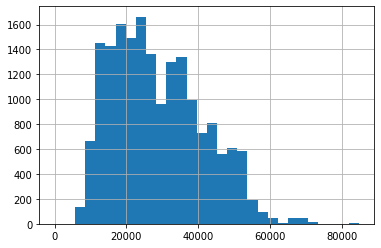

In [51]:
df['airports_nearest'].hist(bins=30)

### cityCenters_nearest

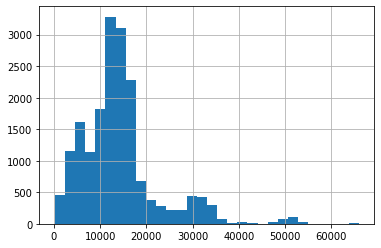

In [52]:
df['cityCenters_nearest'].hist(bins=30)

[в начало](#назад2)

### parks_around3000

In [53]:
df['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

Заполним все ячейки, для которых отсутствует информация в столбце ponds_nearet, как 0. В конце концов, для покупателя отсутствие информации о наличии водоемов будет влиять так же, как их отсутствие.

In [54]:
df['parks_around3000']=df['parks_around3000'].fillna(0)

Проверим на адекватность. Не окажется ли так, что среди заполненных нулями значений окажутся квартиры, для которых по нашим данным в радиусе 3000м есть хотя бы один парк:

In [55]:
display(df.query('parks_around3000==0 and parks_nearest>0'))
print('Квартир с ошибкой:',len(df.query('parks_around3000==0 and parks_nearest>0')))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,good_data,new_locality_name
1590,3,7500000.0,70.0,2017-07-11,2,NaN,18.0,37.0,13,NaN,...,Санкт-Петербург,14878.0,9791.0,0.0,3064.0,1.0,264.0,4.0,True,санкт-петербург
10959,9,3000000.0,31.1,2017-03-21,1,NaN,5.0,17.7,2,NaN,...,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0,True,санкт-петербург
19208,17,14950000.0,187.0,2017-10-12,5,3.0,2.0,80.0,2,NaN,...,Санкт-Петербург,36805.0,8656.0,0.0,3013.0,3.0,537.0,49.0,False,санкт-петербург
19430,9,3900000.0,30.5,2018-02-22,1,2.6,5.0,16.5,1,NaN,...,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0,True,санкт-петербург


Квартир с ошибкой: 4


Можно было бы установить для них значение 1, но мы будем действовать в рамках уже озвученной гипотезы: если информации о парках в исходных данных нет, она не должна повлиять на поведение покупателя (о наличии парка он узнает уже целенаправленно изучая именно это объявление). В любом случае, даже если наша гипотеза окажется неверной — таких случаев единицы, а значит серьезного влияния на выводы они не окажут.  
[в начало](#назад2)

### parks_nearest

Всего объявлений рядом с парками: 8079


Text(0, 0.5, 'Кол-во объявлений')

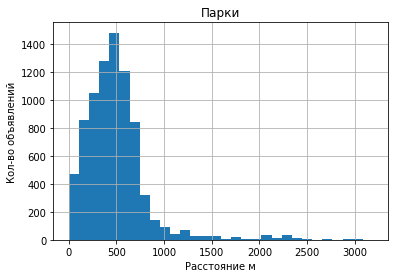

In [56]:
print('Всего объявлений рядом с парками:',len(df[~df['parks_nearest'].isna()]))
df['parks_nearest'].hist(bins=30)
plt.title('Парки')
plt.xlabel('Расстояние м')
plt.ylabel('Кол-во объявлений')

### ponds_around3000
Будем действовать по аналогии с парками:

In [57]:
df['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

Заполним все ячейки, для которых отсутствует информация в столбце ponds_nearet, как 0, и проверим на адекватность.

In [58]:
df['ponds_around3000']=df['ponds_around3000'].fillna(0)
print('Квартир с ошибкой:',len(df.query('ponds_around3000==0 and ponds_nearest>0')))

Квартир с ошибкой: 0


### ponds_nearest

Всего объявлений рядом с водоемами: 9110


Text(0, 0.5, 'Кол-во объявлений')

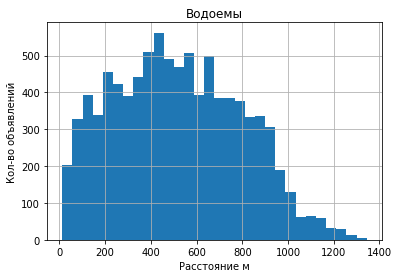

In [59]:
print('Всего объявлений рядом с водоемами:',len(df[~df['ponds_nearest'].isna()]))
df['ponds_nearest'].hist(bins=30)
plt.title('Водоемы')
plt.xlabel('Расстояние м')
plt.ylabel('Кол-во объявлений')

[в начало](#назад2)

### days_exposition
Один из самых интересных параметров. Сколько времени висело объявление. Построим основные параметры распределения для квартир с 1-4 комнатами:

In [60]:
col1=df.query('1<=rooms<=4')['days_exposition']
col2=df.query('good_data')['days_exposition']

print('До фильтров:')
print('Медиана:',col1.median())
print('Среднее:',col1.mean())
print('Граница выбросов:',whisker_up(col1))
print('Кол-во выбросов:',len(df.query('1<=rooms<=4')[col1>whisker_up(col1)]))
print('Нижняя граница:',col1.min())
print('\nПосле фильтров:')
print('Медиана:',col2.median())
print('Среднее:',col2.mean())
print('Граница выбросов:',whisker_up(col2))
print('Кол-во выбросов:',len(df.query('good_data')[col2>whisker_up(col2)]))
print('Нижняя граница:',col2.min())

До фильтров:
Медиана: 95.0
Среднее: 179.31956281961297
Граница выбросов: 505.0
Кол-во выбросов: 1628
Нижняя граница: 1.0

После фильтров:
Медиана: 91.0
Среднее: 173.156205505458
Граница выбросов: 481.5
Кол-во выбросов: 1422
Нижняя граница: 1.0


Можно верить в чудеса и мгновенные успешные продажи с подписанием всех бумаг в тот же день. А можно построить гистограмму. Рассмотрим диапазон квартир "проданных" за первые 2 недели:

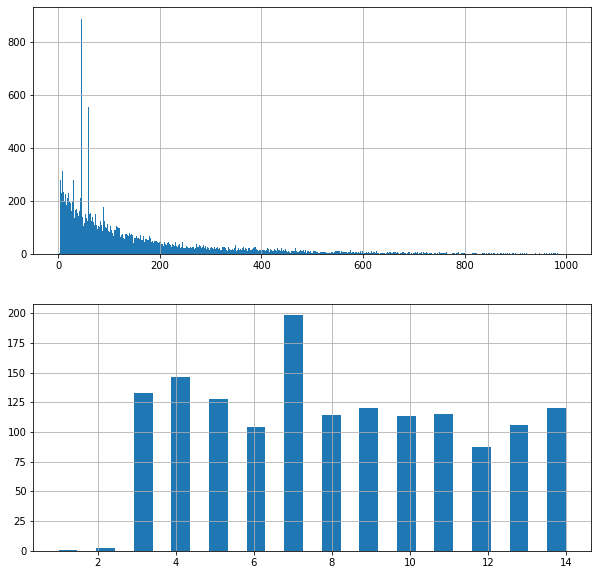

In [61]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
df.query('good_data and days_exposition<1000')['days_exposition'].hist(bins=500)
plt.subplot(2, 1, 2)
df.query('good_data and days_exposition<15')['days_exposition'].hist(bins=27)



Можно предположить, что кто-то ошибся (или кто-то переубедил его сдавать, а не продавать квартиру), обнаружил это в тот же вечер или на утро и не редактируя удалил свое объявление. Но мы точно не можем уверенно ответить на вопрос, ошибка это или нет, а кол-во таких объявлений крайне мало. Поэтому просто понадеемся, что у продавцов всё сложилось очень удачно и не станем выключать эти объявления из анализа. Но в голове будем держать, что на деле какие-то ощутимые продажи начинаются со сроков размещения от 3 дней (что логично, т.к. продавцу и покупателю надо связаться, договориться о встрече и быть уверенными в дальнейшем).
С выбросами сложнее. Верхняя граница составляет примерно полтора года, но полторы тысячи объявлений всё равно в неё не укладываются.  
Оценим параметры для каждой категории отдельно:

Text(0.5, 0, 'Время продажи в днях')

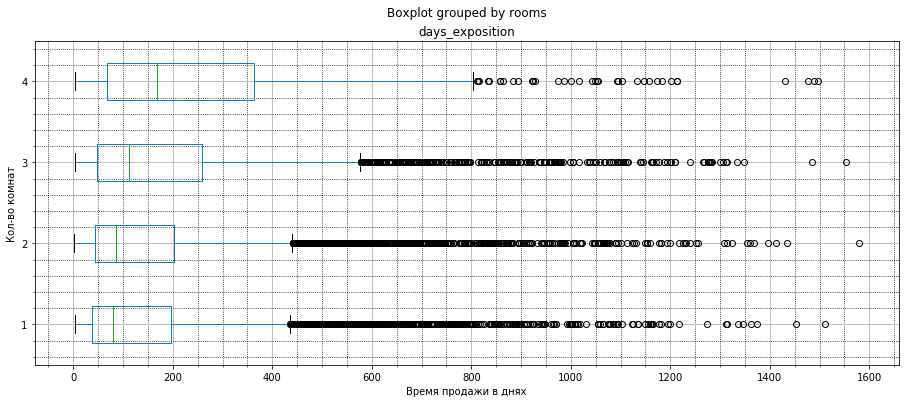

In [62]:
df.query('good_data').boxplot(column='days_exposition',by='rooms',vert=False, figsize=(15, 6))
plt.minorticks_on()
plt.grid(which='minor', color = 'k', linestyle = ':')
plt.ylabel('Кол-во комнат')
plt.xlabel('Время продажи в днях')

Можно отметить, что чем больше комнат в квартире, тем выше характерное время продажи, причем зависимость не линейная, а степенная.
Так же в массиве есть квартиры с отсутствующей информацией по общему времени публикации. Как указывалалось выше, будем считать, что это так и не проданные (на момент выгрузки базы) квартиры. Для удобства мат.операций не будем пока что заменять значения `NaN` на что-то другое.
Выбросов достаточно много и ситуация с ними совершенно не ясна. Либо это опечатка/ошибка и мы никак этого не выясним. Либо это реальные люди/фирмы, готовые ждать по полтора года (а может просто забыли?). Для чистоты эксперимента всё-таки стоит отфильтровать слишком долгие продажи.

In [63]:
#верхние границы
col_name='days_exposition'
whisker_up1=whisker_up(df.query('good_data and rooms==1')[col_name])
whisker_up2=whisker_up(df.query('good_data and rooms==2')[col_name])
whisker_up3=whisker_up(df.query('good_data and rooms==3')[col_name])
whisker_up4=whisker_up(df.query('good_data and rooms==4')[col_name])
#нижние границы
whisker_down1=5
whisker_down2=whisker_down(df.query('good_data and rooms==2')[col_name])
whisker_down3=whisker_down(df.query('good_data and rooms==3')[col_name])
whisker_down4=whisker_down(df.query('good_data and rooms==4')[col_name])
#добавим фильтр и сохраним строки со значениями NaN, которым мы доверяем
df['good_data']=(df['good_data'] & 
                (
                ((df['rooms']==1) & (df[col_name]<=whisker_up1) & (df[col_name]>=whisker_down1)) |
                ((df['rooms']==2) & (df[col_name]<=whisker_up2) & (df[col_name]>=whisker_down2)) |
                ((df['rooms']==3) & (df[col_name]<=whisker_up3) & (df[col_name]>=whisker_down3)) |
                ((df['rooms']==4) & (df[col_name]<=whisker_up4) & (df[col_name]>=whisker_down4))|
                ((df[col_name].isna()))
                )
                )
# таблица
df_good=df.query('good_data')
table=df_good.groupby('rooms')['days_exposition'].agg(['count','median','mean'])
table.columns=['кол-во объявлений','медианное время продажи','среднее время продажи']
table

,кол-во объявлений,медианное время продажи,среднее время продажи
rooms,,,
1,5610,69.0,109.698752
2,5374,74.0,112.864533
3,3707,97.0,146.644996
4,625,152.0,214.430400


А как дела в 2019 году?

In [64]:
df_good=df.query('good_data and 2018<=first_day_exposition<2019')
table=df_good.groupby('rooms')['days_exposition'].agg(['count','median','mean'])
table.columns=['кол-во объявлений','медианное время продажи','среднее время продажи']
table

,кол-во объявлений,медианное время продажи,среднее время продажи
rooms,,,
1,2433,58.0,85.219893
2,2205,60.0,90.203628
3,1421,73.0,103.311752
4,209,99.0,121.416268


[в начало](#назад2)

## Новые столбцы
Добавим столбцы, необходимые нам для выполнения поставленных задач.
### ppm
Столбец с ценой 1 кв.м. квартиры

In [65]:
df['ppm']=df['last_price']/df['total_area']

В задании от нас также хотели увидеть 10 городов с наибольшим числом объявлений, среднюю стоимость кв.м. жилья в них, а так же определить самый дешевый и дорогой из них:


топ-10 по кол-ву объявлений:
санкт-петербург    11140
мурино               458
шушары               373
кудрово              357
всеволожск           310
колпино              296
пушкин               271
парголово            261
гатчина              259
выборг               192
Name: new_locality_name, dtype: int64
Суммарно: 13917


Text(0.5, 0, 'средняя цена за кв.м')

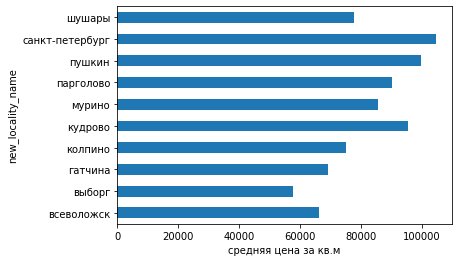

In [66]:
print('\nтоп-10 по кол-ву объявлений:')
print(df.query('good_data')['new_locality_name'].value_counts().head(10))
print('Суммарно:', df.query('good_data')['new_locality_name'].value_counts().head(10).sum())
top10=list(df.query('good_data')['new_locality_name'].value_counts().head(10).index)
df.query('good_data and (new_locality_name in @top10)').groupby('new_locality_name')['ppm'].mean().plot(kind='barh')
plt.xlabel('средняя цена за кв.м')

За отчетный период самая высокая цена за кв.м. ожидаемо в Санкт-Петербурге, а самая низкая оказалась в Выборге.  
[в начало](#назад3)

### year, month и day_of_week
Столбцы, содержащие год, месяц и день недели старта продажи соответственно:

In [67]:
df['year']=df['first_day_exposition'].dt.year
df['month']=df['first_day_exposition'].dt.month
week={0:'пн',
      1:'вт',
      2:'ср',
      3:'чт',
      4:'пт',
      5:'сб',
      6:'вс'}
df['day_of_week']=df['first_day_exposition'].dt.weekday.replace(week)

Оценим, сколько квартир было выставлено на продажу в тот или иной год:

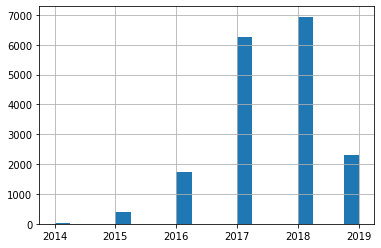

In [68]:
dfgd=df.query('good_data')
dfgd['year'].hist(bins=20)

А влияние месяца и дня недели?

Text(0, 0.5, 'Кол-во объявлений')

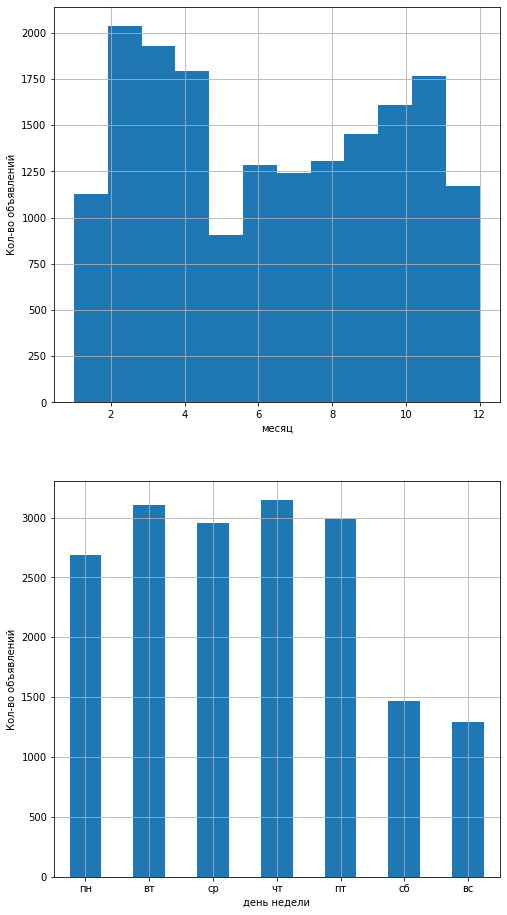

In [69]:
plt.figure(figsize=(8,16))
plt.subplot(2,1,1)
dfgd['month'].hist(bins=12)
plt.xlabel('месяц')
plt.ylabel('Кол-во объявлений')
plt.subplot(2,1,2)
dfgd['day_of_week'].value_counts().reindex(['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс']).plot(kind='bar',grid=True,rot=0)
plt.xlabel('день недели')
plt.ylabel('Кол-во объявлений')

Судя по всему, люди не любят заморачиваться с продажами в мае и январе. Из возможных причин: в мае длинные выходные и старт дачного сезона — многие на это время планируют отпуск, а не продажу квартиры. Ну а в декабре-январе страна деморализована, ищет подарки, а потом постепенно восстанавливается от недели новогодних праздников.  
Объяснить резкое нежелание продавать квартиры в выходные дни сложнее. Данная тенденция не зависит от времени года. Из возможных гипотез: для кого-то это тоже работа. Вероятно пн-пт риелтор в основном выкладывает объявления, а на выходные планирует показ недвижимости потенциальным покупателям (если они ещё и в праздники не работают, это хорошо бы объяснило спад кол-ва объявлений в мае и январе).
Посмотрим, как менялась медианная стоимость квадратного метра по годам:

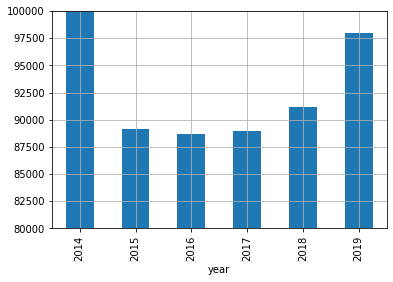

In [70]:
dfgd.groupby('year')['ppm'].mean().plot(kind='bar',ylim=(80000,100000),grid=True)

Для многих квартир сроки продажи занимают до полутора лет. Этот график говорит лишь по какой цене продали квартиру выставленную на торги в соответствующем году, а не сколько стоила квартира, проданная в этом году. Ограничимся квартирами, которые продались в пределах полугода:

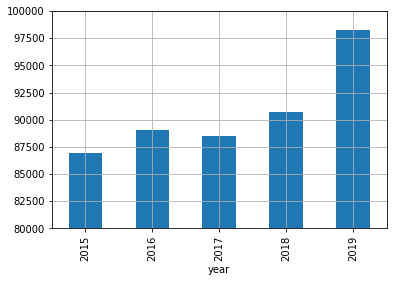

In [71]:
dfgd.query('30<days_exposition<=200').groupby('year')['ppm'].mean().plot(kind='bar',ylim=(80000,100000),grid=True)

Тенденция к повышению цены на квадратный метр стала более явной, после того, как мы оставили лишь квартиры, продававшиеся не слишком долго и не слишком медленно. А 2019 год всё ещё демонстрирует нам резкий скачок цены на квадратный метр.  
Рассмотрим характерное время, за которое квартиры были проданы.

Text(0, 0.5, 'Медианное время продажи в днях')

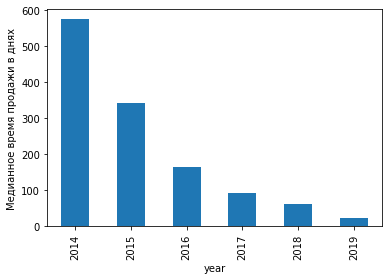

In [72]:
dfgd.groupby('year')['days_exposition'].median().plot(kind='bar')
plt.ylabel('Медианное время продажи в днях')

Впечатляющие результаты. Похоже год от года скорость продажи на сервисе Яндекс.Недвижимости стремительно растет при увеличении числа объявлений. Промежутку 2014-2016 конечно не стоит слишком доверять - кол-во объявлений невелико, а сервис только переходил от агрегации к самостоятельному размещениею объявлений, но вот данные о 2017-2019 гг говорят сами за себя. На этот период приходится множество нововведений сервиса (3D-туры, статистика по инфраструктуре и экологии, тепловая карта цен).  
[в начало](#назад3)

### kitchen_area_div_total
Столбец, содержащий отношение площади кухни к общей площади квартиры. Но перед тем как высчитывать это отношение и отношение жилой площади к общей, заполним пропущенные значения. Вполне разумным будет заменить `NaN`, на характерное значение `kitchen_area`. Высчитаем медианную пропорцию площади кухни к общей площади, для каждого вида квартир квартир из категории `good_data`. Затем заполним пропуски, помножив эту величину на общую площадь.

In [73]:
# вычислим коэффициенты - можно написать пару циклов, но их написание съет больше времени:
kadt1=(df.query('good_data and rooms==1')['kitchen_area']/df.query('good_data and rooms==1')['total_area']).median()
kadt2=(df.query('good_data and rooms==2')['kitchen_area']/df.query('good_data and rooms==2')['total_area']).median()
kadt3=(df.query('good_data and rooms==3')['kitchen_area']/df.query('good_data and rooms==3')['total_area']).median()
kadt4=(df.query('good_data and rooms==4')['kitchen_area']/df.query('good_data and rooms==4')['total_area']).median()

# заполним NaN на произведение (total_area x kadtn, где n=1,2,3,4):
def kitchen_miss(s):
    if np.isnan(s['kitchen_area']):
        if s['rooms']==1:
            return s['total_area']*kadt1
        if s['rooms']==2:
            return s['total_area']*kadt2
        if s['rooms']==3:
            return s['total_area']*kadt3
        if s['rooms']==4:
            return s['total_area']*kadt4
    else:
        return s['kitchen_area']  
df['kitchen_area']=df.apply(kitchen_miss,axis=1)

# имея новые значения kitchen_area, заполним Living_area,
# как разниу между общей площадью и площадью кухни
def living_miss(s):
    if (np.isnan(s['living_area'])) and (s['rooms'] in [1,2,3,4]):
        return (s['total_area']-s['kitchen_area'])
    else:
        return s['living_area']
df['living_area']=df.apply(living_miss,axis=1)
# проверка
df.query('1<=rooms<=4')[['total_area','kitchen_area','living_area']].isna().mean()

total_area      0.0
kitchen_area    0.0
living_area     0.0
dtype: float64

Теперь добавим столбец `kitchen_area_div_total`:

In [74]:
df['kitchen_area_div_total']=df['kitchen_area']/df['total_area']

### living_area_div_total
Столбец, содержащий отношение жилой площади к общей площади квартиры:

In [75]:
df['living_area_div_total']=df['living_area']/df['total_area']

### cc_nearest_km
Добавим столбец с округленным расстоянием до центра города в км:

In [76]:
df['cc_nearest_km']=round(df['cityCenters_nearest']/1000)

Text(0.5, 1.0, 'Диаграмма рассеивания для цены за кв.м/расстояния от центра')

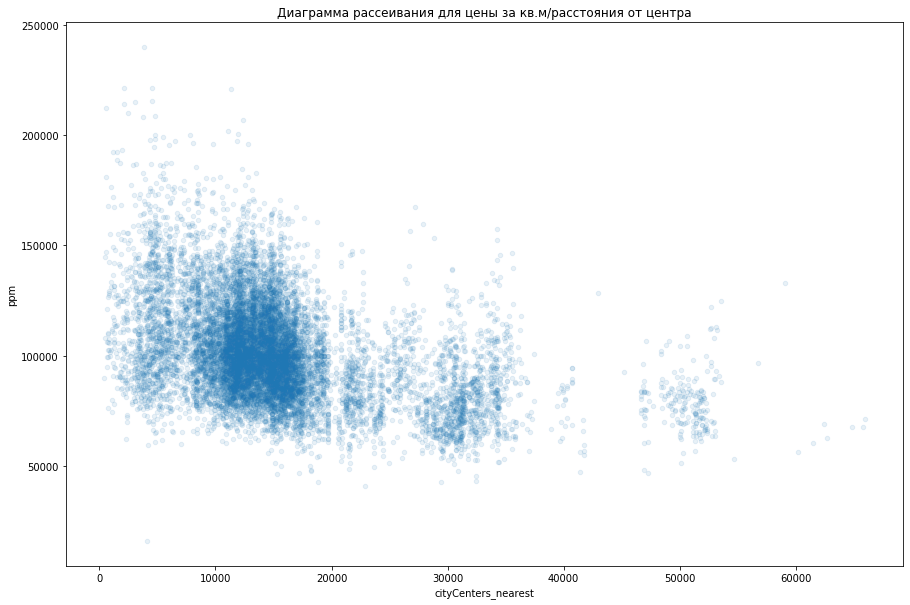

In [77]:
dfgd.plot(x='cityCenters_nearest',y='ppm',kind='scatter',alpha=0.1,figsize=(15,10))
plt.title('Диаграмма рассеивания для цены за кв.м/расстояния от центра')

Оценивать влияние удаленности от центра логичнее всего на однотипных объектах. Оценим, насколько больше минимальная средняя цена для каждого км:

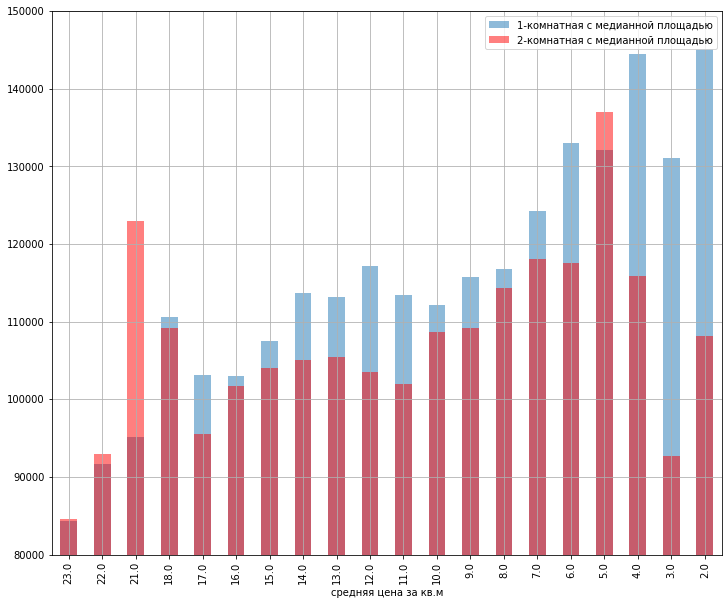

In [78]:

(df.query('good_data and rooms==1 and (35<=total_area<=37) and new_locality_name=="санкт-петербург"').groupby('cc_nearest_km')['ppm'].mean()).plot(kind='bar',figsize=(10,20),alpha=0.5,ylim=(80000,150000))
(df.query('good_data and rooms==2 and (51<=total_area<=53) and new_locality_name=="санкт-петербург"').groupby('cc_nearest_km')['ppm'].mean()).plot(kind='bar',color='r',figsize=(12,10),alpha=0.5,grid=True)
plt.legend(['1-комнатная с медианной площадью','2-комнатная с медианной площадью'])
plt.xlabel('средняя цена за кв.м')
plt.gca().invert_xaxis()

In [79]:
print('\n однокомнатная')
print(df.query('good_data and rooms==1 and (35<=total_area<=37) and new_locality_name=="санкт-петербург"').groupby('cc_nearest_km')['ppm'].mean().describe())
print('\n двухкомнатная')
print(df.query('good_data and rooms==2 and (51<=total_area<=53) and new_locality_name=="санкт-петербург"').groupby('cc_nearest_km')['ppm'].mean().describe())


 однокомнатная
count        23.000000
mean     112114.481174
std       17634.532873
min       78885.057912
25%      101177.096542
50%      113190.216700
75%      120658.486342
max      145055.555556
Name: ppm, dtype: float64

 двухкомнатная
count        20.000000
mean     107412.594850
std       11806.631300
min       84619.158072
25%      101866.498227
50%      106813.408832
75%      114714.291549
max      136977.379933
Name: ppm, dtype: float64


Вероятно "сильным" можно считать рост цен примерно в 10 км от центра. Пометим эти квартиры параметром 'is_center'

In [80]:
def is_center(s):
    if s['cc_nearest_km']<=10:
        return True
    else:
        return False
df['is_center']=df.apply(is_center,axis=1)

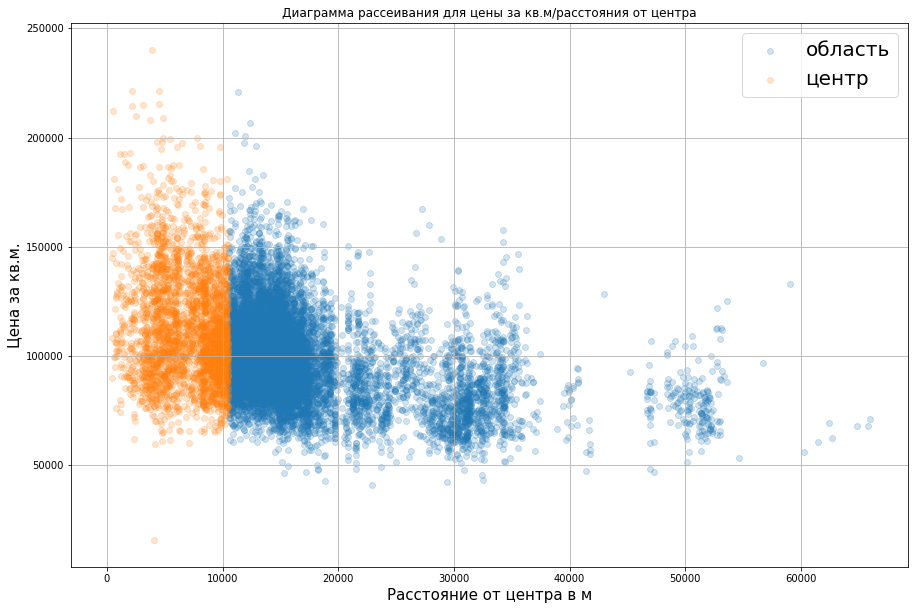

In [81]:
dfgd=df.query('good_data')
plt.figure(figsize=(15,10))
dfic=dfgd.query('is_center')
dfnc=dfgd.query('~is_center')
plt.scatter(dfnc['cityCenters_nearest'],dfnc['ppm'],alpha=0.2)
plt.scatter(dfic['cityCenters_nearest'],dfic['ppm'],alpha=0.2)
plt.title('Диаграмма рассеивания для цены за кв.м/расстояния от центра')
plt.legend(['область','центр'],fontsize=20)
plt.xlabel('Расстояние от центра в м',fontsize=15)
plt.ylabel('Цена за кв.м.',fontsize=15)
plt.grid(True)
plt.show()



[в начало](#назад3)

### floor_category
Добавим категорию расположения. Поделим квартиры на три группы:  
- квартиры на первом этаже `первый`
- квартиры на последнем этаже `последний`
- остальные `другой`

,mean
floor_category,
другой,94923.457038
первый,77820.660230
последний,82205.557880


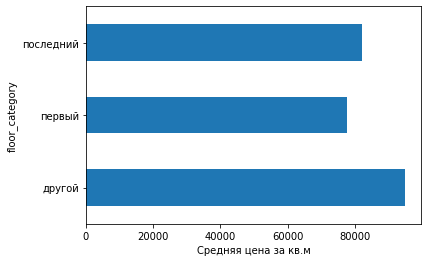

In [82]:
def floor_sort(s):
    if s['floor']==1:
        return 'первый'
    if s['floor']==s['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_category']=df.apply(floor_sort,axis=1)
df.query('good_data').groupby('floor_category')['ppm'].mean().plot(kind='barh')
plt.xlabel('Средняя цена за кв.м')

display(df.query('good_data').groupby('floor_category')['ppm'].agg(['mean']))                                                                

Как видно из диаграмы, дешевле всего квадратный метр обходится в квартирах на первом этаже (уличный шум, опасность взлома), чуть дороже на последнем (летняя жара, опасность протекающей крыши и прочие прелести). Ну а находящиеся в промежутке квартиры оказываются в среднем дороже прочих на 10-15%.

# good_data

In [83]:
dfgd=df.query('good_data')
dfgd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17634 entries, 1 to 23696
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            17634 non-null  int64         
 1   last_price              17634 non-null  float64       
 2   total_area              17634 non-null  float64       
 3   first_day_exposition    17634 non-null  datetime64[ns]
 4   rooms                   17634 non-null  int64         
 5   ceiling_height          10627 non-null  float64       
 6   floors_total            17634 non-null  float64       
 7   living_area             17634 non-null  float64       
 8   floor                   17634 non-null  int64         
 9   is_apartment            1974 non-null   object        
 10  studio                  17634 non-null  bool          
 11  open_plan               17634 non-null  bool          
 12  kitchen_area            17634 non-null  float6

В нашем распоряжении после всех фильтров ~16.6k объявлений о квартирах с 1-4 комнатами, среди которых нет квартир с подозрительно высокими или низкими показателями. Если бы в нашем распоряжении было больше информации о домах (например серия или год постройки), можно было бы уверенно разбить их на группы и задать высоту потолков, характерную для периода постройки, но т.к. у нас её нет, просто заполним недостающую информацию в столбце `ceiling_height` медианными значениями отдельно для центра и области:

In [84]:
# значения медиан высоты потолка
ch_median1=dfgd.query('rooms==1 and ~is_center')['ceiling_height'].median()
ch_median2=dfgd.query('rooms==2 and ~is_center')['ceiling_height'].median()
ch_median3=dfgd.query('rooms==3 and ~is_center')['ceiling_height'].median()
ch_median4=dfgd.query('rooms==4 and ~is_center')['ceiling_height'].median()

ch_median_ctr1=dfgd.query('rooms==1 and is_center')['ceiling_height'].median()
ch_median_ctr2=dfgd.query('rooms==2 and is_center')['ceiling_height'].median()
ch_median_ctr3=dfgd.query('rooms==3 and is_center')['ceiling_height'].median()
ch_median_ctr4=dfgd.query('rooms==4 and is_center')['ceiling_height'].median()
# функция для замены
def ch_miss(s):
    if np.isnan(s['ceiling_height']):
        if s['is_center']:
            if s['rooms']==1:
                return ch_median_ctr1
            if s['rooms']==2:
                return ch_median_ctr2
            if s['rooms']==3:
                return ch_median_ctr3
            if s['rooms']==4:
                return ch_median_ctr4           
        else:
            if s['rooms']==1:
                return ch_median1
            if s['rooms']==2:
                return ch_median2
            if s['rooms']==3:
                return ch_median3
            if s['rooms']==4:
                return ch_median4
    else:
        return s['ceiling_height']
# замена NaN            
dfgd['ceiling_height']=dfgd.apply(ch_miss,axis=1)

Итак. Можно приступить к более детальному перекрестному анализу. Построим матрицу корреляции:

In [85]:
dfgd[['last_price','ppm','rooms','cityCenters_nearest','total_images','total_area','balcony','days_exposition']].corr().style.background_gradient(cmap='viridis')

,last_price,ppm,rooms,cityCenters_nearest,total_images,total_area,balcony,days_exposition
last_price,1.000000,0.628044,0.530062,-0.312590,0.159694,0.757285,0.084464,0.118248
ppm,0.628044,1.000000,-0.131145,-0.403528,0.131905,0.024714,0.044605,-0.044509
rooms,0.530062,-0.131145,1.000000,-0.111978,0.090800,0.843176,0.034125,0.173314
cityCenters_nearest,-0.312590,-0.403528,-0.111978,1.000000,-0.040771,-0.146375,0.044734,-0.017904
total_images,0.159694,0.131905,0.090800,-0.040771,1.000000,0.112434,0.049383,0.013881
total_area,0.757285,0.024714,0.843176,-0.146375,0.112434,1.000000,0.085409,0.189827
balcony,0.084464,0.044605,0.034125,0.044734,0.049383,0.085409,1.000000,-0.011575
days_exposition,0.118248,-0.044509,0.173314,-0.017904,0.013881,0.189827,-0.011575,1.000000


Похоже, самое серьезное влияние на цену квартиры оказывает её общая площадь. Следующим по значимости для покупателей является кол-во комнат в квартире. А вот с увеличением расстояния до центра цена на квартиры ожидаемо падает. Корреляция конечной цены с кол-вом балконов оказалсь ещё слабее, чем с кол-вом приложенных к объявлению фотографий. Забавно, но есть слабая обратная корреляция между ценой за кв.м и общей площадью квартиры.
Оценим так же корреляцию цены и наличия рядом водоемов и парков:

In [86]:
dfgd[['ppm','ponds_around3000','ponds_nearest','parks_around3000','parks_nearest','total_images']].corr()

,ppm,ponds_around3000,ponds_nearest,parks_around3000,parks_nearest,total_images
ppm,1.000000,0.271340,-0.028246,0.266524,0.037105,0.131905
ponds_around3000,0.271340,1.000000,-0.277361,0.354003,0.046870,0.001750
ponds_nearest,-0.028246,-0.277361,1.000000,-0.135923,0.031542,-0.007497
parks_around3000,0.266524,0.354003,-0.135923,1.000000,-0.254251,0.022157
parks_nearest,0.037105,0.046870,0.031542,-0.254251,1.000000,-0.011939
total_images,0.131905,0.001750,-0.007497,0.022157,-0.011939,1.000000


Если верить таблице, то кол-во парков в округе влияет на цену больше, чем дистанция до ближайшего. Ситуация с водоемами аналогична. А если рассмотреть отдельно центр?

In [87]:
dfgd.query('~is_center')[['ppm','ponds_around3000','ponds_nearest','parks_around3000','parks_nearest','total_images']].corr()

,ppm,ponds_around3000,ponds_nearest,parks_around3000,parks_nearest,total_images
ppm,1.000000,0.227100,0.019983,0.239397,0.053416,0.148760
ponds_around3000,0.227100,1.000000,-0.247215,0.368258,0.051287,0.010265
ponds_nearest,0.019983,-0.247215,1.000000,-0.140797,0.037826,-0.020515
parks_around3000,0.239397,0.368258,-0.140797,1.000000,-0.260715,0.025357
parks_nearest,0.053416,0.051287,0.037826,-0.260715,1.000000,0.012650
total_images,0.148760,0.010265,-0.020515,0.025357,0.012650,1.000000


In [88]:
dfgd.query('is_center')[['ppm','ponds_around3000','ponds_nearest','parks_around3000','parks_nearest','total_images']].corr()

,ppm,ponds_around3000,ponds_nearest,parks_around3000,parks_nearest,total_images
ppm,1.000000,0.133962,-0.025743,0.014530,0.011755,0.137637
ponds_around3000,0.133962,1.000000,-0.310890,0.145372,0.038390,-0.005275
ponds_nearest,-0.025743,-0.310890,1.000000,-0.081905,0.028995,0.015699
parks_around3000,0.014530,0.145372,-0.081905,1.000000,-0.249950,0.040439
parks_nearest,0.011755,0.038390,0.028995,-0.249950,1.000000,-0.052828
total_images,0.137637,-0.005275,0.015699,0.040439,-0.052828,1.000000


Ситуация принципиально не изменилась.

Оценим, как различается стоимость жилья с похожей площадью и высотой потолков, но разным числом комнат:

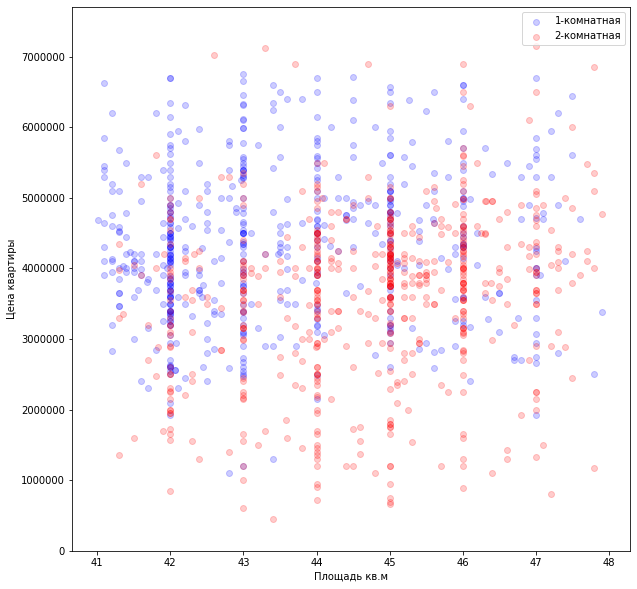

Цена большой однокомнатной квартиры выше в среднем на 19502 руб за кв.м


In [89]:
plt.figure(figsize=(10,10))
df1_area=dfgd.query('41<total_area<48 and rooms==1 and 2.7>=ceiling_height>=2.6 and floor_category=="другой"')
df2_area=dfgd.query('41<total_area<48 and rooms==2 and 2.7>=ceiling_height>=2.6 and floor_category=="другой"')
plt.scatter(df1_area['total_area'],df1_area['last_price'],alpha=0.2,color='b')
plt.scatter(df2_area['total_area'],df2_area['last_price'],alpha=0.2,color='r')
plt.legend(['1-комнатная','2-комнатная'])
plt.xlabel('Площадь кв.м')
plt.ylabel('Цена квартиры')
plt.ylim(0,7700000)
plt.show()
print('Цена большой однокомнатной квартиры выше в среднем на', round(df1_area['ppm'].mean()-df2_area['ppm'].mean()),'руб за кв.м')

Повторим, сравнив двух- и трехкомнатные квартиры:

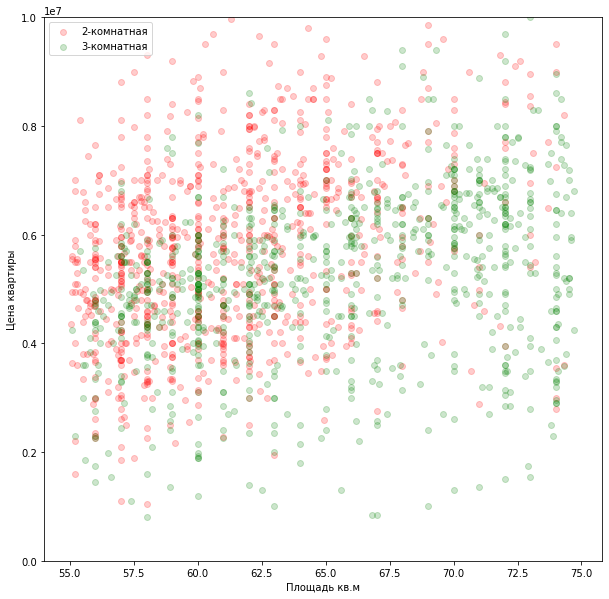

Цена большой двухкомнатной квартиры выше в среднем на 13088 руб за кв.м


In [90]:
plt.figure(figsize=(10,10))
df2_area=dfgd.query('55<total_area<75 and rooms==2 and 2.7>=ceiling_height>=2.6 and floor_category=="другой"')
df3_area=dfgd.query('55<total_area<75 and rooms==3 and 2.7>=ceiling_height>=2.6 and floor_category=="другой"')
plt.scatter(df2_area['total_area'],df2_area['last_price'],alpha=0.2,color='r')
plt.scatter(df3_area['total_area'],df3_area['last_price'],alpha=0.2,color='g')
plt.legend(['2-комнатная','3-комнатная'])
plt.xlabel('Площадь кв.м')
plt.ylabel('Цена квартиры')
plt.ylim(0,10000000)
plt.show()
print('Цена большой двухкомнатной квартиры выше в среднем на', round(df2_area['ppm'].mean()-df3_area['ppm'].mean()),'руб за кв.м')

Сравним двух- и трехкомнатные квартиры:

In [91]:
df2_area=dfgd.query('55<total_area<75 and rooms==2 and 2.7>=ceiling_height>=2.6 and floor_category=="другой"')
df3_area=dfgd.query('55<total_area<75 and rooms==3 and 2.7>=ceiling_height>=2.6 and floor_category=="другой"')
print('Цена большой двухкомнатной квартиры в 5-6 этажном доме выше в среднем на', round(df2_area.query('5<=floors_total<=6')['ppm'].mean()-df3_area.query('5<=floors_total<=6')['ppm'].mean()),'руб за кв.м')
print('Цена большой двухкомнатной квартиры в 7-9 этажном доме выше в среднем на', round(df2_area.query('6<floors_total<=9')['ppm'].mean()-df3_area.query('6<floors_total<=9')['ppm'].mean()),'руб за кв.м')
print('Цена большой двухкомнатной квартиры в 10-15 этажном доме выше в среднем на', round(df2_area.query('9<floors_total<=15')['ppm'].mean()-df3_area.query('9<floors_total<=15')['ppm'].mean()),'руб за кв.м')
print('Цена большой двухкомнатной квартиры в 16-27 этажном доме выше в среднем на', round(df2_area.query('15<floors_total<=27')['ppm'].mean()-df3_area.query('15<floors_total<=27')['ppm'].mean()),'руб за кв.м')

Цена большой двухкомнатной квартиры в 5-6 этажном доме выше в среднем на 5063 руб за кв.м
Цена большой двухкомнатной квартиры в 7-9 этажном доме выше в среднем на -3145 руб за кв.м
Цена большой двухкомнатной квартиры в 10-15 этажном доме выше в среднем на 3819 руб за кв.м
Цена большой двухкомнатной квартиры в 16-27 этажном доме выше в среднем на 7747 руб за кв.м


Как видно, зависимость не так тривиальна. Для того, чтобы сделать выводы, нам понадобится выборка больших размеров и с большим числом параметров (материал, серия дома или хотя бы год постройки). Возможно это хорошее направление для доп.исследования.  
[в начало](#назад3)

### Центр
Последнее, что мы ещё не изучили - это как отличаются (и отличаются ли вообще) по своим параметрам квартиры в центре от остальных квартир Ленинградской области:

In [92]:
pd.pivot_table(dfgd, values=['total_area','ceiling_height','rooms','ppm'], index=['is_center'], aggfunc=np.mean)

,ceiling_height,ppm,rooms,total_area
is_center,,,,
False,2.615546,86721.295103,1.921008,51.611683
True,2.808862,112971.827250,2.329273,62.566944


Из таблицы можно сделать вывод, что чем ближе к центру, тем выше самые важные показатели квартиры, включая цену на метр.  
Посмотрим детализацию по числу комнат:

In [93]:
display(pd.pivot_table(dfgd, values=['total_area','ceiling_height','ppm','balcony'], index=['is_center','rooms'], aggfunc=np.mean))
print('\nЦЕНТР')
print(df.query('good_data and ~is_center').groupby('floor_category')['ppm'].agg(['mean']))
print('\nДРУГИЕ РАЙОНЫ')
print(df.query('good_data and is_center').groupby('floor_category')['ppm'].agg(['mean']))

balcony  ceiling_height            ppm  total_area
is_center rooms                                                     
False     1      0.581412        2.620372   94442.218489   36.459768
          2      0.618872        2.609729   83471.438932   52.255449
          3      0.769059        2.614351   79969.427338   69.680684
          4      0.872642        2.632783   81420.304113   91.110259
True      1      0.502326        2.660450  121342.056385   35.946217
          2      0.385081        2.775000  113535.845276   53.370877
          3      0.371169        2.874938  107737.127871   74.531464
          4      0.185915        3.009155  109178.775078  106.939127


ЦЕНТР
                        mean
floor_category              
другой          91174.345301
первый          72791.788319
последний       75285.868830

ДРУГИЕ РАЙОНЫ
                         mean
floor_category               
другой          114952.958099
первый          104537.427624
последний       110745.625586


In [94]:
# таблица для расчета 
dfgd['всего за год']=1
display(pd.pivot_table(dfgd, values=['всего за год'], index=['year','is_center'], aggfunc=np.sum))

всего за год
year is_center              
2014 False                 9
     True                  5
2015 False               281
     True                 98
2016 False              1392
     True                336
2017 False              5245
     True               1011
2018 False              5874
     True               1064
2019 False              1960
     True                359

В целом ничего необычного. Нельзя сказать, чтобы квартиры в центре стали продавать чаще или реже относительно остальных. И там и там с ростом средней площади квартиры постепенно снижается цена за кв.м. Из интересного: 
- В центре по мере увеличения комнат несколько больше меняется высота потолков - в диапазоне от 2.66 до 3 метров, в то время как в других районах она так и колеблется недалеко от значения 2.62. С очевидностью влияние старой застройки.
- Среднее кол-во балконов у квартир в центре меньше. Если в центре только одна из пяти четырехкомнатных квартир имеет балкон, то в остальных районах он у такой квартиры будет с намного большей вероятностью.
- Как видно из таблиц, тенденция к низким ценам на квартиры первого и последнего этажей сохраняется. Но в центре разница в ценах за квадратный метр намного ниже (5-10% вместо 15-18%).

[в начало](#назад3)

# Выводы
Были рассмотрены типичные квартиры с кол-вом комнат от 1 до 4 в Петербурге и ЛО:
- В результате анализа нами было установлено, что **основным фактором, влияющим на стоимость квартиры, является её общая площадь**.
- Влияние количества комнат на цену квартиры не так очевидно. С ростом числа комнат средняя общая площадь квартиры растет, но при похожей площади и высоте потолков, цена за кв.м. может оказаться выше у квартиры с меньшим кол-вом комнат.
- Мы выяснили, что люди охотнее покупают квартиры не на первом и не на последнем этажах здания. Наименьшим спросом пользуются **квартиры на первом этаже (цена за метр на 10-18% ниже)**.
- Удалось выделить сезонность продаж. В **декабре-январе и в мае новых объявлений меньше**. Больше всего квартир выставляется на продажу в период с февраля по апрель. Так же стоит отметить, что в выходные дни новых объявлений появляется существенно меньше.
- В общем случае **медианное время продажи квартиры** лежит в диапазоне от **70 до 150 дней**, с тенденцией к быстрому нелинейному росту времени продажи от количества комнат. Долгими продажами в общем можно считать продажи от 1 года. Но с течением времени продажи ускорялись. Если мы возьмем только 2018 год, то при большой выборке медианное время продажи сократилось уже до 50-100 дней.
- Количество парков и водоемов в радиусе 3 км влияет на цену кв.м. сильнее, чем близость к какому-то из них.  
- **Удаленность от центра** и правда **значительно влияет на стоимость квартиры**. И не мудрено: квартиры в центре превосходят в среднем по всем параметрам, интересующим покупателя - площадь больше, комнат больше, потолки выше.. а ещё балконов меньше. Также на цену наверняка оказывают значительное влияние неизвестные центры городского досуга - кинотеатры, музеи, театры и рестораны, а так же близость к транспортным узлам города. 

<a class="anchor" id="0-bullet">